In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats import norm
import os

In [58]:
#dataframe contains current application data
app_data = pd.read_csv('/kaggle/input/bank-data/application_data.csv')

#dataframe contains previous application data
pre_app_data = pd.read_csv('/kaggle/input/bank-data/previous_application.csv')

Below I am checking for null values, outliers and missing values and taking appropriate action

In [59]:
#calculating the % null values in each column of current application data
per=round(app_data.isnull().sum(axis=0).sort_values(ascending=False)/len(app_data)*100,2)

In [60]:
#Find if current application data has any duplicate IDs
dup=app_data[app_data.duplicated('SK_ID_CURR')]
print("Count of Duplicate IDs :",dup['SK_ID_CURR'].count())

Count of Duplicate IDs : 0


In [61]:
#displaying the % null values for the following loaners attribute
print("Checking for null values (%) in the following loaners attributes :")
print("Contract Type:",per['NAME_CONTRACT_TYPE'])
print("Gender:",per['CODE_GENDER'])
print("Car ownership:",per['FLAG_OWN_CAR'])
print("Realty ownership:",per['FLAG_OWN_REALTY'])
print("Childer count:",per['CNT_CHILDREN'])

Checking for null values (%) in the following loaners attributes :
Contract Type: 0.0
Gender: 0.0
Car ownership: 0.0
Realty ownership: 0.0
Childer count: 0.0


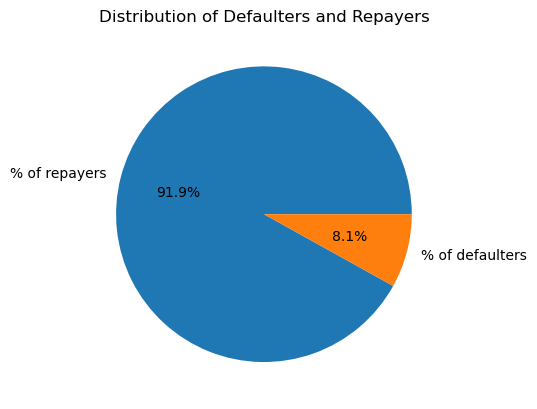

In [62]:
#Calculating the percentage of defaulters and repayers in the current applicants
defaulters_perc=round((app_data['TARGET'].value_counts()[1]/len(app_data['TARGET']))*100,2)
repayers_perc=round((app_data['TARGET'].value_counts()[0]/len(app_data['TARGET']))*100,2)

#array for values and labels for pie chart
perc_values=np.array([repayers_perc,defaulters_perc])
perc_labels=('% of repayers','% of defaulters')

#ploting the pie chart
plt.pie(perc_values,labels=perc_labels,autopct='%1.1f%%')
plt.title('Distribution of Defaulters and Repayers')
plt.show()

In [63]:
#displaying % null values for income related columns
print("Checking null values in % for income related columns :")
print(per['AMT_INCOME_TOTAL'],per['AMT_CREDIT'],per['AMT_ANNUITY'],per['AMT_GOODS_PRICE'])

Checking null values in % for income related columns :
0.0 0.0 0.0 0.09


In [64]:
#displaying % null values for personal attributes of the current applicants
print("Null values (%) for income type :",per['NAME_INCOME_TYPE'])
print("Null Values (%) for education type :",per['NAME_EDUCATION_TYPE'])
print("Null values (%) for family status :",per['NAME_FAMILY_STATUS'])
print("Null values (%) for housing type :",per['NAME_HOUSING_TYPE'])
print("Null values (%) occupation type :",per['OCCUPATION_TYPE'])

Null values (%) for income type : 0.0
Null Values (%) for education type : 0.0
Null values (%) for family status : 0.0
Null values (%) for housing type : 0.0
Null values (%) occupation type : 31.35


Checking the Distribution of the variables in the current application data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Sales staff'),
  Text(2, 0, 'Core staff'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'High skill tech staff'),
  Text(6, 0, 'Accountants'),
  Text(7, 0, 'Medicine staff'),
  Text(8, 0, 'Security staff'),
  Text(9, 0, 'Cooking staff'),
  Text(10, 0, 'Cleaning staff'),
  Text(11, 0, 'Private service staff'),
  Text(12, 0, 'Low-skill Laborers'),
  Text(13, 0, 'Waiters/barmen staff'),
  Text(14, 0, 'Secretaries'),
  Text(15, 0, 'Realty agents'),
  Text(16, 0, 'HR staff'),
  Text(17, 0, 'IT staff')])

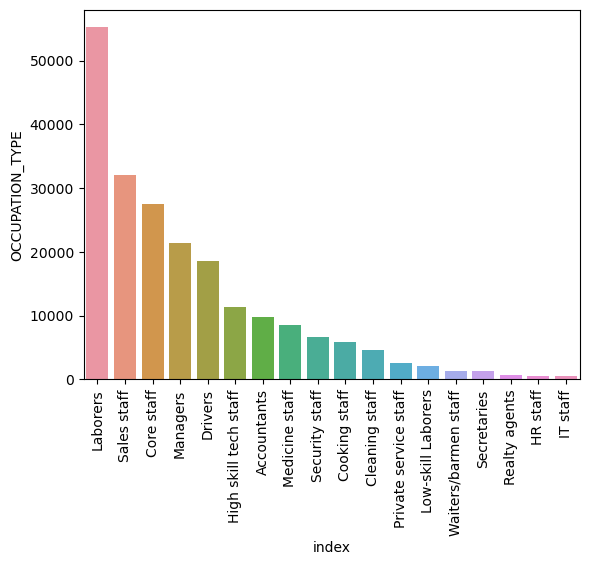

In [65]:
#displaying the occupation type distribution of current applicants
d2=app_data['OCCUPATION_TYPE'].value_counts().reset_index()
sns.barplot(x="index",y="OCCUPATION_TYPE",data=d2)
plt.xticks(rotation = 90)

In [66]:
#displaying % null values for personal attributes of the current applicants
print("Null values (%) for applicants following attributes :")
print("Age :",per['DAYS_BIRTH'])
print("Employment :",per['DAYS_EMPLOYED'])
print("Registration change :",per['DAYS_REGISTRATION'])
print("Change in identity doc :",per['DAYS_ID_PUBLISH'])

Null values (%) for applicants following attributes :
Age : 0.0
Employment : 0.0
Registration change : 0.0
Change in identity doc : 0.0


Text(0.5, 0.98, 'Data Distribution')

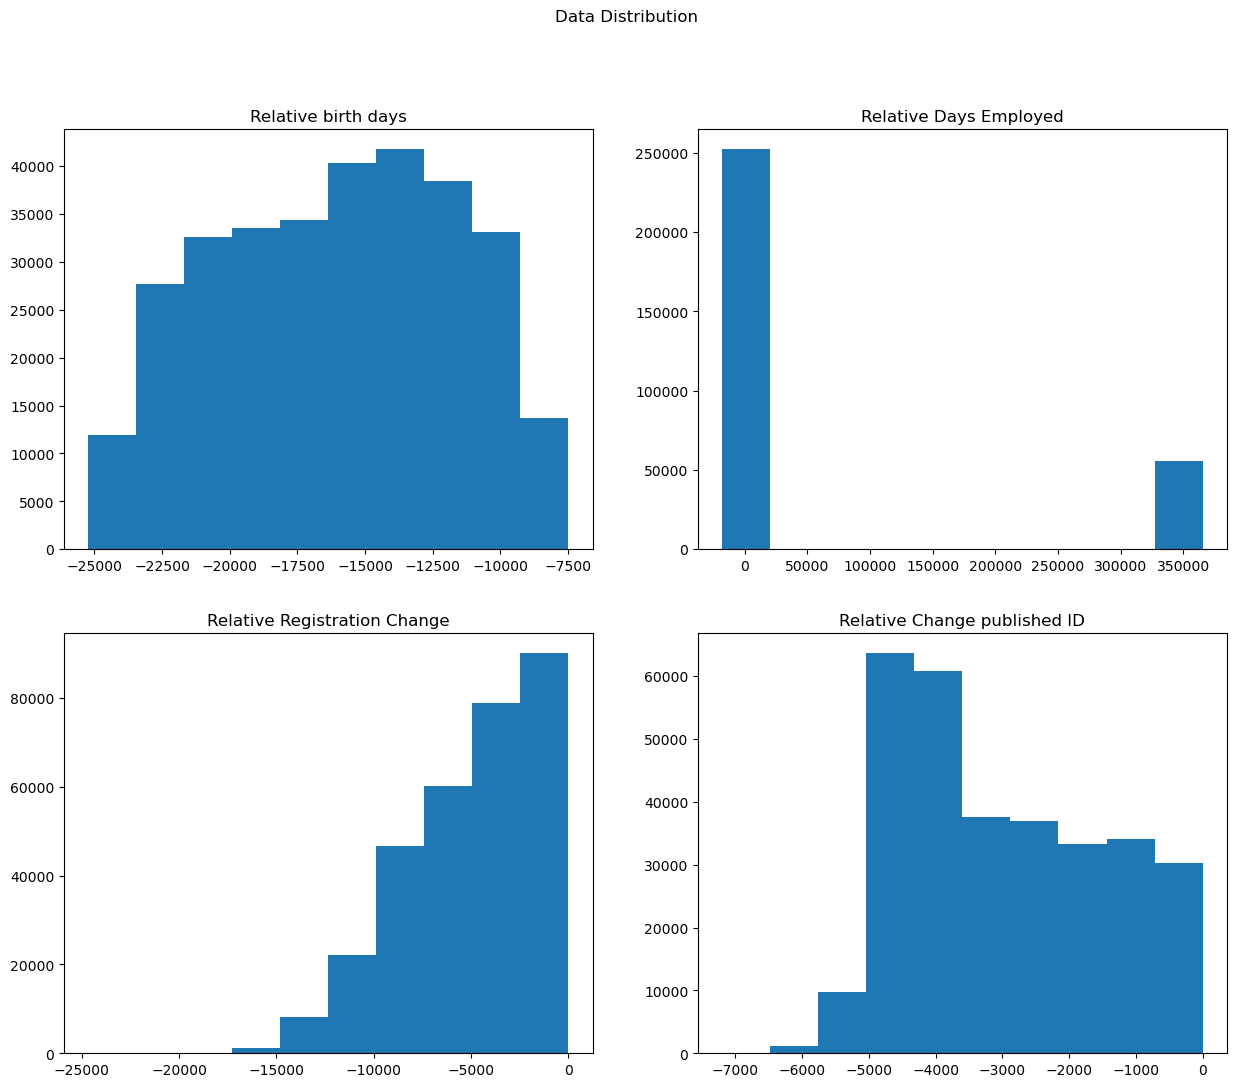

In [67]:
#displaying the distribution of age, employment, registration change details, change in ID published of the current applicants
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.hist(app_data['DAYS_BIRTH'])
plt.title("Relative birth days")

plt.subplot(2,2,2)
plt.hist(app_data['DAYS_EMPLOYED'])
plt.title("Relative Days Employed")

plt.subplot(2,2,3)
plt.hist(app_data['DAYS_REGISTRATION'])
plt.title("Relative Registration Change")

plt.subplot(2,2,4)
plt.hist(app_data['DAYS_ID_PUBLISH'])
plt.title("Relative Change published ID")

plt.suptitle("Data Distribution")

In [68]:
#displaying the living situation details of the current applicants
print((app_data[['APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']].isnull().sum()/len(app_data))*100)

APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49.760822
FLOORSMIN_MODE                  67

In [69]:
#created a consolidated attribute - Living Situation that sums up the overall living situation of the current applicants
#This attribute is created by summing up all the living situation variables above

col_name=['APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','TOTALAREA_MODE']
app_data['Living Situation']=app_data[col_name].sum(axis=1)
print("% of Null values for newly creted living situation col :",round((app_data['Living Situation'].value_counts()[0]/len(app_data)*100),2))
app_data['Living Situation'].fillna(app_data['Living Situation'].mean())
print("After replacing Null values: ",app_data['Living Situation'].isnull().sum())
print("Describe Living Situation column :",app_data['Living Situation'].describe())

% of Null values for newly creted living situation col : 48.21
After replacing Null values:  0
Describe Living Situation column : count    307511.000000
mean          3.984452
std           4.543111
min           0.000000
25%           0.000000
50%           3.135800
75%           7.685150
max          38.082100
Name: Living Situation, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x78f42b8f2f90>,
 'caps': [<matplotlib.lines.Line2D at 0x78f42b8e2650>,
 'boxes': [<matplotlib.lines.Line2D at 0x78f42b8f2bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x78f42b8e2d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x78f42b8df090>],
 'means': []}

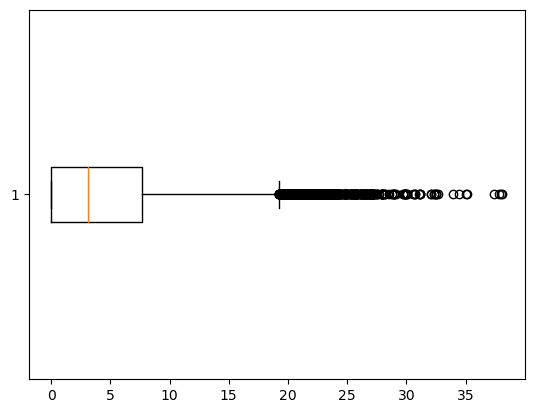

In [70]:
#Boxplot of the newly created Living Situation variable
plt.boxplot(app_data['Living Situation'],vert=False)

(array([1.64949e+05, 6.39500e+04, 5.92060e+04, 1.47390e+04, 3.56200e+03,
        8.12000e+02, 2.00000e+02, 6.90000e+01, 1.70000e+01, 7.00000e+00]),
 array([ 0.     ,  3.80821,  7.61642, 11.42463, 15.23284, 19.04105,
        22.84926, 26.65747, 30.46568, 34.27389, 38.0821 ]),
 <BarContainer object of 10 artists>)

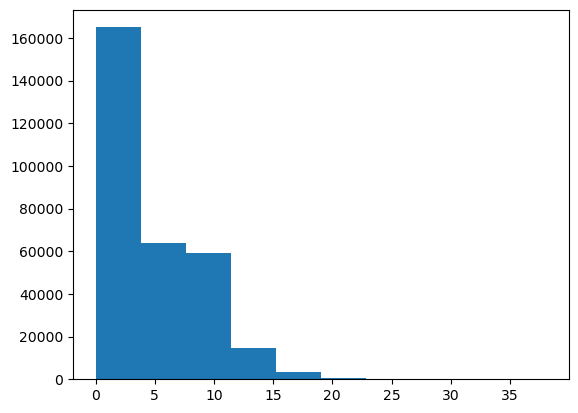

In [71]:
#distribution of the Living Situation variable
plt.hist(app_data['Living Situation'])

In [72]:
#Finding and displaying the outliers in the Living Situation variable using Interquartile range 

ls_q1=app_data['Living Situation'].quantile(.25)  #q1 of the living situation
ls_q3=app_data['Living Situation'].quantile(.75)  #q3 of the living situation
ls_iqr=(ls_q3)-(ls_q1)     #interquartile range

lb_ls=ls_q1-(1.5*ls_iqr)   #lower limit         
ub_ls=ls_q3+(1.5*ls_iqr)   #upper limit

ls_out = app_data[(app_data['Living Situation'].gt(ub_ls) | app_data['Living Situation'].lt(lb_ls))]  #outliers in the living situation variable
print("% of outliers in living Situation : ",(len(ls_out)/len(app_data))*100)   #displaying % outliers in the living situation variable

% of outliers in living Situation :  0.3385244755472162


In [73]:
#created a consolidated attribute - doc given, that sums up the overall docs submitted by the current applicants
#This attribute is created by summing up all the documentation related variables above

doc_col_name=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
app_data['doc given']=app_data[doc_col_name].sum(axis=1)
print("% null values in doc given :",(app_data['doc given'].isnull().sum()/len(app_data['doc given']))*100)
print(app_data['doc given'].describe())


% null values in doc given : 0.0
count    307511.000000
mean          0.930155
std           0.344295
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: doc given, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x78f42bcd3250>,
 'caps': [<matplotlib.lines.Line2D at 0x78f42bcd37d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78f42b93e890>],
 'medians': [<matplotlib.lines.Line2D at 0x78f42bcd3e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x78f42b918210>],
 'means': []}

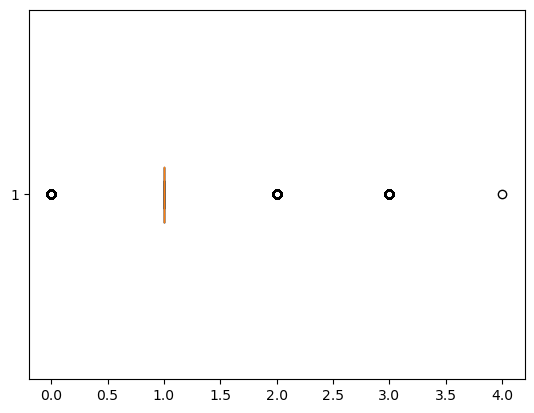

In [74]:
#Boxplot of the newly created doc given variable

plt.boxplot(app_data['doc given'],vert=False)

In [75]:
#Finding and displaying the outliers in the doc given variable using Interquartile range 

dg_q1=app_data['doc given'].quantile(.25)   #q1 of the doc given
dg_q3=app_data['doc given'].quantile(.75)   #q3 of the doc given
dg_iqr=(dg_q3)-(dg_q1)    #interquartile range of the doc given

lb_dg=dg_q1-(1.5*dg_iqr)  #lower limit
ub_dg=dg_q3+(1.5*dg_iqr)  #upper limit

dg_out = app_data[(app_data['doc given'].gt(ub_dg) | app_data['doc given'].lt(lb_dg))]  #outliers in the doc given variable
print("% of outliers in doc given : ",(len(dg_out)/len(app_data))*100)    #displaying % of outliers in the doc given variable

% of outliers in doc given :  12.18005209569739


In [76]:
#displaying the null values in the newly created total enquiries variable
print("% Null Values regarding credit bureau enquiry:")
print(app_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum()/len(app_data)*100)

#displaying the statistical description of the total enquiries variable
print("Describe :")
app_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

% Null Values regarding credit bureau enquiry:
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64
Describe :


,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [77]:
#replacing null values for Credit Bureau enquires variables with the mean values
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mean(),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mean(),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mean(),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_MON'].mean(),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mean(),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(),inplace=True)

#displaying the % null values for Credit Bureau enquires variables after replacing them
print(app_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum()/len(app_data)*100)

#displaying the statistical description after replacing the null values 
app_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
dtype: float64


,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.077983,0.103009,0.190366,0.851923,0.738507,1.738528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.899974
75%,0.000000,0.000000,0.000000,0.267395,0.265474,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


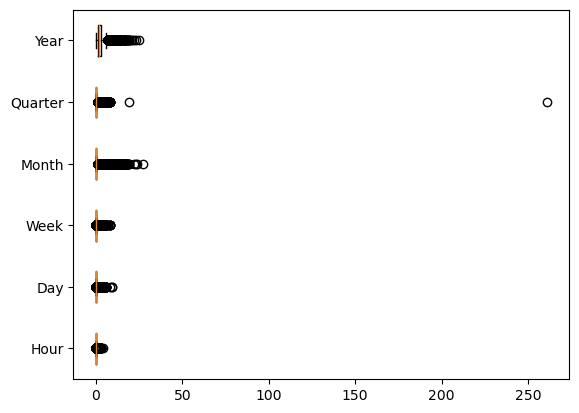

<Figure size 1060x1060 with 0 Axes>

In [78]:
#displaying the boxplot distribution of the Credit Bureau enquiries variable
plt.boxplot(app_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']],vert=False,labels=('Hour','Day','Week','Month','Quarter','Year'))
plt.figure(figsize=(10.6,10.6))
plt.show()

In [79]:
#created a consolidated attribute - total enquiries, that sums up the overall credit bureau enquires done for the current applicants
#This attribute is created by summing up all the credit bureau enquires variables above

cb_col_name=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
app_data['total enquiries']=app_data[cb_col_name].sum(axis=1)

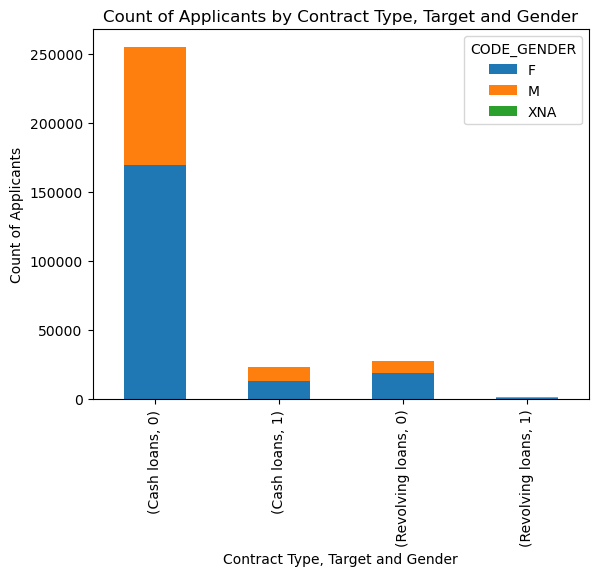

In [80]:
#grouping the target variable according to the type of contract and gender
ct=app_data.groupby(['NAME_CONTRACT_TYPE','TARGET','CODE_GENDER'])['SK_ID_CURR'].count()

ct.unstack().plot(kind='bar', stacked=True)
# Set the chart title and axis labels
plt.title('Count of Applicants by Contract Type, Target and Gender')
plt.xlabel('Contract Type, Target and Gender')
plt.ylabel('Count of Applicants')
plt.show()

Text(0.5, 1.0, 'Flat ownership details')

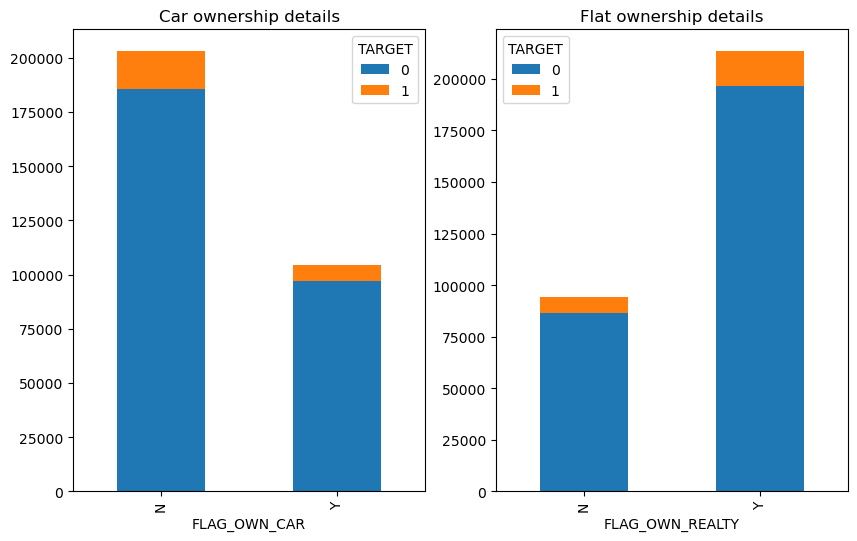

In [81]:
#displaying the car ownership and realty ownership w.r.t target variable
fig, axs = plt.subplots(1,2,figsize=(10,6))

car_ownership=app_data.groupby(['FLAG_OWN_CAR','TARGET'])['TARGET'].count()
car_ownership.unstack().plot(kind='bar', stacked=True,ax=axs[0])
axs[0].set_title("Car ownership details")

flat_ownership=app_data.groupby(['FLAG_OWN_REALTY','TARGET'])['TARGET'].count()
flat_ownership.unstack().plot(kind='bar', stacked=True,ax=axs[1])
axs[1].set_title("Flat ownership details")

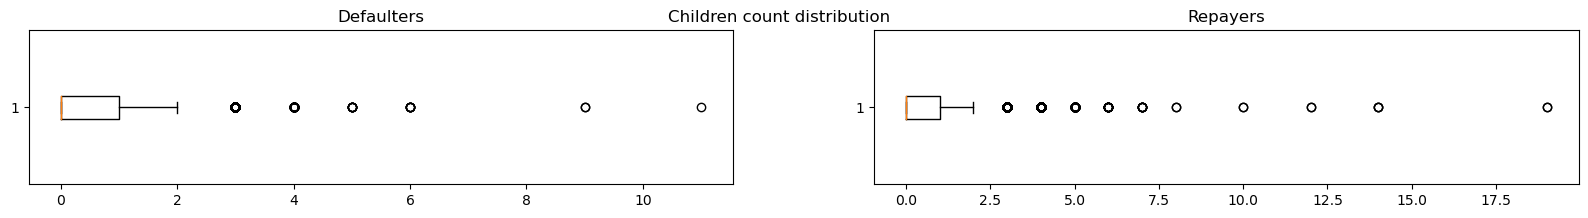

In [82]:
#displaying the children count distribution of the repayers VS the defaulters
plt.figure(figsize=(20,2))
defaulters=app_data[app_data['TARGET']==1]
cc_defaulters_plot1=list(defaulters['CNT_CHILDREN'])
plt.subplot(1,2,1)
plt.boxplot(cc_defaulters_plot1,vert=False)
plt.title("Defaulters")

repayers=app_data[app_data['TARGET']==0]
cc_repayers_plot2=list(repayers['CNT_CHILDREN'])
plt.subplot(1,2,2)
plt.boxplot(cc_repayers_plot2,vert=False)
plt.title("Repayers")
plt.suptitle("Children count distribution")
plt.show()

In [83]:
#Calculating the % outlier in repayers using Interquartile range

q1_rep_cc = repayers['CNT_CHILDREN'].quantile(.25) #q1 for children count
q3_rep_cc = repayers['CNT_CHILDREN'].quantile(.75) #q3 for children count
iqr_rep_cc = q3_rep_cc-q1_rep_cc   #interquartile range for children count

lb_rep_cc = q1_rep_cc - 1.5*(iqr_rep_cc)   #lower limit for children count
ub_rep_cc = q3_rep_cc + 1.5*(iqr_rep_cc)   #upper limit for children count


rep_cc_out = repayers[(repayers['CNT_CHILDREN'].gt(ub_rep_cc) | repayers['CNT_CHILDREN'].lt(lb_rep_cc))]
print("Outliers count of children count in repayers :",len(rep_cc_out))
print("% outliers of children count in repayers :",round(len(rep_cc_out)/len(repayers)*100,2))

Outliers count of children count in repayers : 3843
% outliers of children count in repayers : 1.36


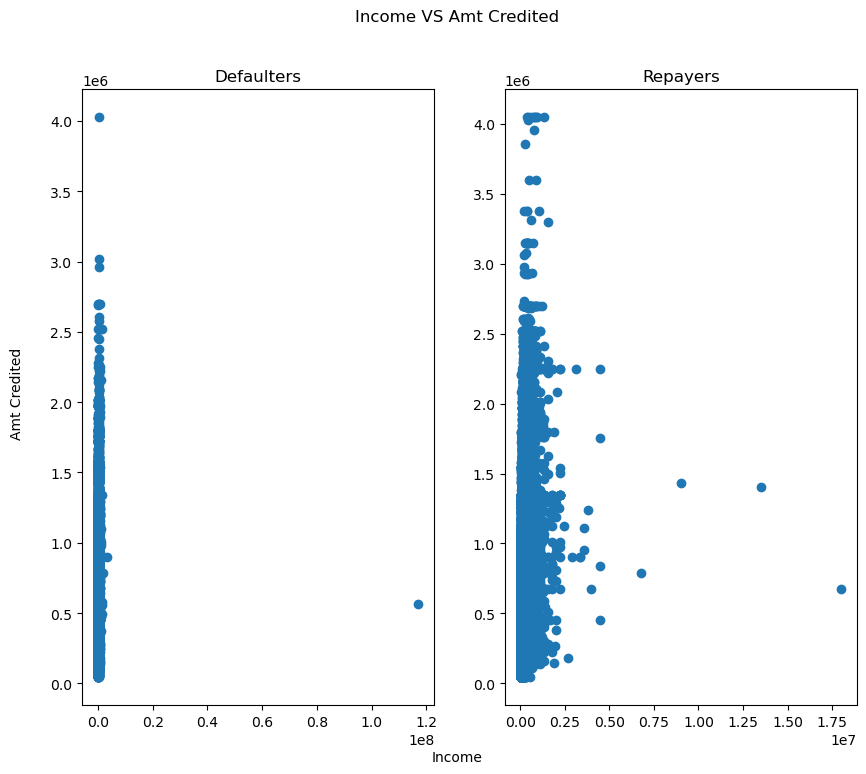

In [84]:
#Comparing the total income and credit amount given to the repayers and defaulters
defaulters_income=list(defaulters['AMT_INCOME_TOTAL'])
defaulters_credit=list(defaulters['AMT_CREDIT'])
fig = plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.scatter(defaulters_income,defaulters_credit)
plt.title('Defaulters')

repayers_income=list(repayers['AMT_INCOME_TOTAL'])
repayers_credit=list(repayers['AMT_CREDIT'])
plt.subplot(1,2,2)
plt.scatter(repayers_income,repayers_credit)
plt.title('Repayers')

plt.suptitle("Income VS Amt Credited")

fig.text(0.5, 0.04, 'Income', ha='center')
fig.text(0.06, 0.5, 'Amt Credited', ha='center', va='center', rotation='vertical')
plt.show()

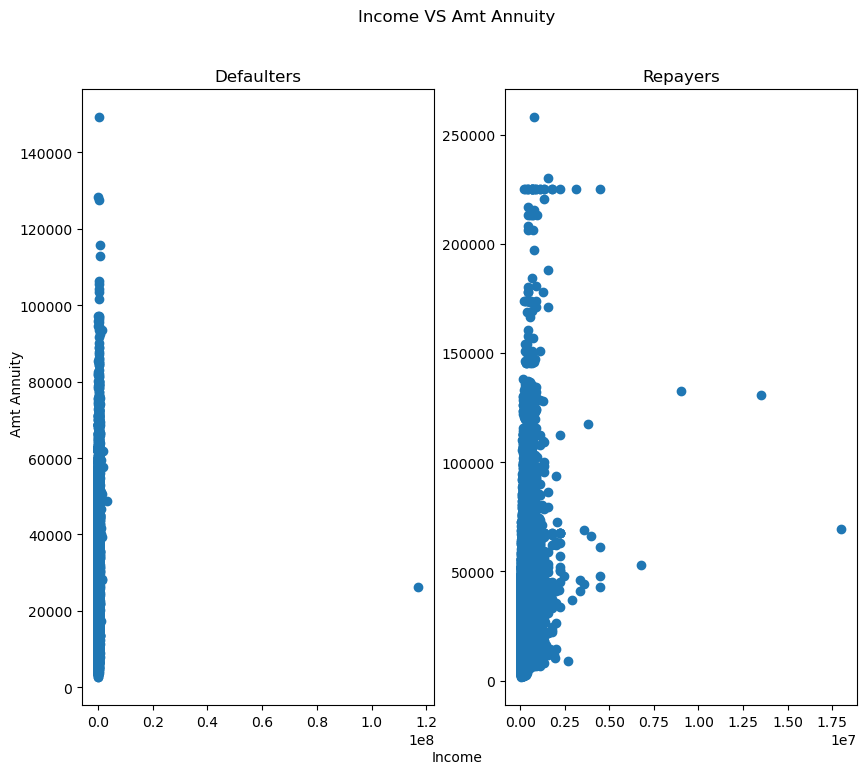

In [85]:
#Comparing the total income and monthly repayment towards the loan given of the repayers and defaulters
defaulters_an=list(defaulters['AMT_ANNUITY'])
fig1=plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.scatter(defaulters_income,defaulters_an)
plt.title('Defaulters')

repayers_an=list(repayers['AMT_ANNUITY'])
plt.subplot(1,2,2)
plt.scatter(repayers_income,repayers_an)
plt.title('Repayers')

plt.suptitle("Income VS Amt Annuity")

fig1.text(0.5, 0.04, 'Income', ha='center')
fig1.text(0.06, 0.5, 'Amt Annuity', ha='center', va='center', rotation='vertical')
plt.show()

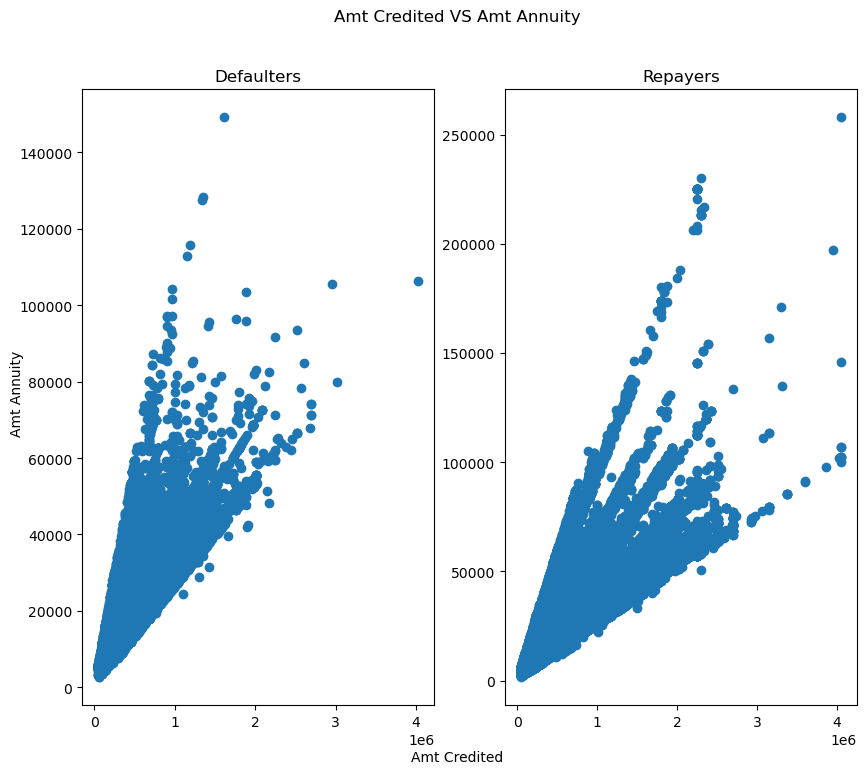

In [86]:
#Comparing the credit amount given and monthly repayment amount towards the loan by  the repayers and defaulters

fig2=plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.scatter(defaulters_credit,defaulters_an)
plt.title('Defaulters')

plt.subplot(1,2,2)
plt.scatter(repayers_credit,repayers_an)
plt.title('Repayers')

plt.suptitle("Amt Credited VS Amt Annuity")

fig2.text(0.5, 0.04, 'Amt Credited', ha='center')
fig2.text(0.06, 0.5, 'Amt Annuity', ha='center', va='center', rotation='vertical')
plt.show()

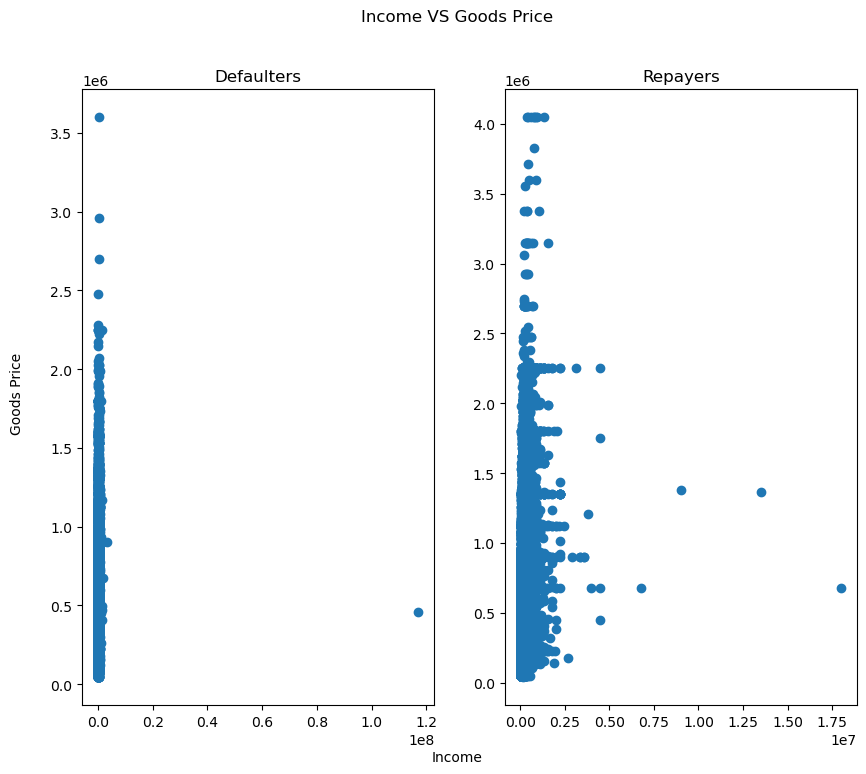

In [87]:
#Comparing the credit amount given for the goods and total income of the repayers and defaulters

defaulters_gp=list(defaulters['AMT_GOODS_PRICE'])
fig3=plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.scatter(defaulters_income,defaulters_gp)
plt.title('Defaulters')

repayers_gp=list(repayers['AMT_GOODS_PRICE'])
plt.subplot(1,2,2)
plt.scatter(repayers_income,repayers_gp)
plt.title('Repayers')

plt.suptitle("Income VS Goods Price")

fig3.text(0.5, 0.04, 'Income', ha='center')
fig3.text(0.06, 0.5, 'Goods Price', ha='center', va='center', rotation='vertical')
plt.show()

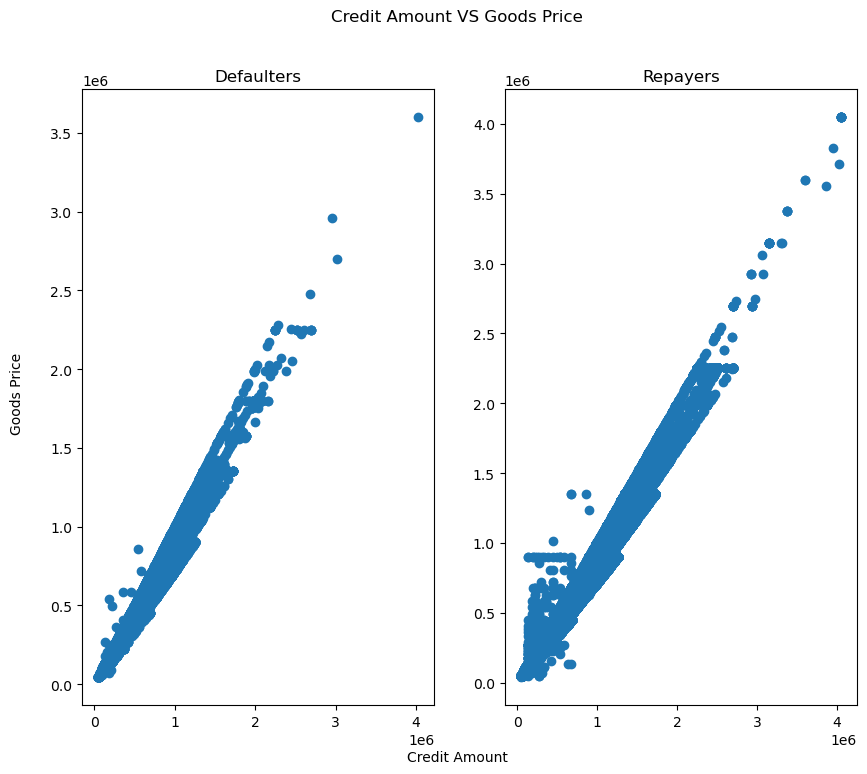

In [88]:
#Comparing the credit amount given for the goods and goods price for the repayers and defaulters

fig4=plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.scatter(defaulters_credit,defaulters_gp)
plt.title('Defaulters')

plt.subplot(1,2,2)
plt.scatter(repayers_credit,repayers_gp)
plt.title('Repayers')

plt.suptitle("Credit Amount VS Goods Price")

fig4.text(0.5, 0.04, 'Credit Amount', ha='center')
fig4.text(0.06, 0.5, 'Goods Price', ha='center', va='center', rotation='vertical')
plt.show()

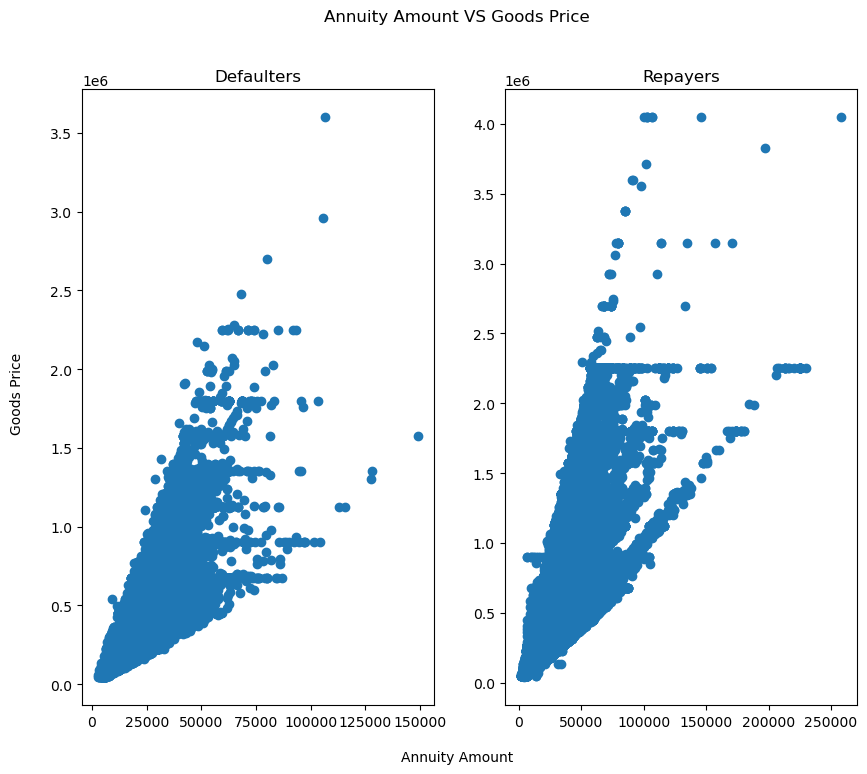

In [89]:
#Comparing the monthly repayment towards the loan and good price against which loan is applied for the repayers and defaulters

fig5=plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.scatter(defaulters_an,defaulters_gp)
plt.title('Defaulters')

plt.subplot(1,2,2)
plt.scatter(repayers_an,repayers_gp)
plt.title('Repayers')

plt.suptitle("Annuity Amount VS Goods Price")

fig5.text(0.5, 0.04, 'Annuity Amount', ha='center')
fig5.text(0.06, 0.5, 'Goods Price', ha='center', va='center', rotation='vertical')
plt.show()

Text(0.04, 0.5, 'Count')

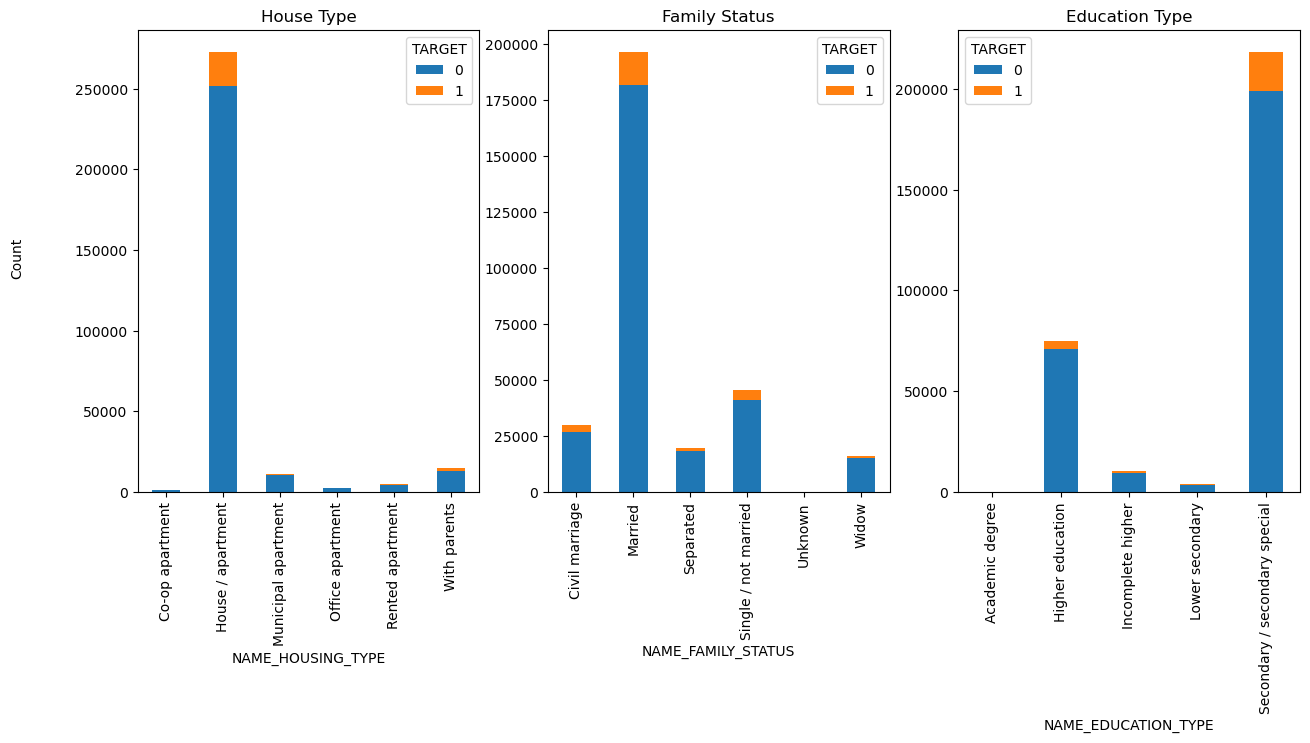

In [90]:
#Checking the distribution of the loaners attributes like housing type,family status,education type in comparison to the target variable

#Create a figure with two subplots
fig, axs = plt.subplots(1, 3,figsize=(15,6))

#Plot the first data set on the first subplot
house_type=app_data.groupby(['NAME_HOUSING_TYPE','TARGET'])['TARGET'].count()
house_type.unstack().plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('House Type')

# Plot the second data set on the second subplot
fam_sta=app_data.groupby(['NAME_FAMILY_STATUS','TARGET'])['TARGET'].count()
fam_sta.unstack().plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Family Status')

edu_type=app_data.groupby(['NAME_EDUCATION_TYPE','TARGET'])['TARGET'].count()
edu_type.unstack().plot(kind='bar',stacked=True,ax=axs[2])
axs[2].set_title('Education Type')

fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

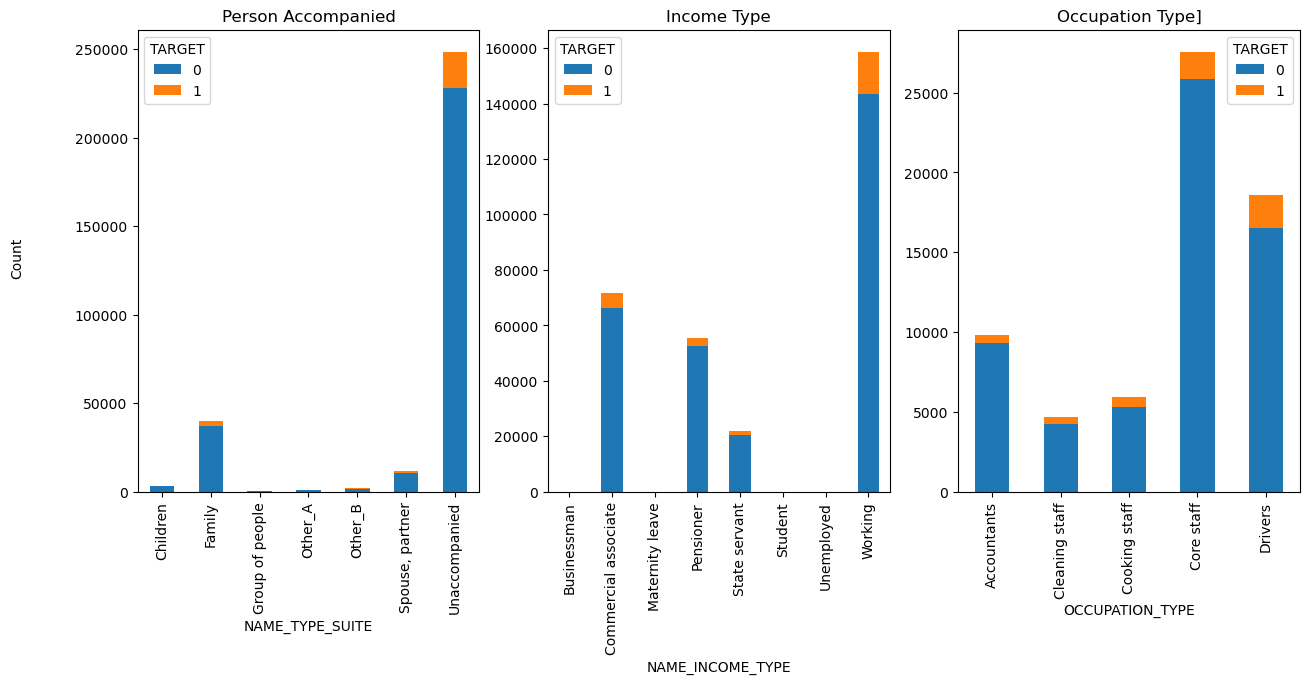

In [91]:
#Comparison of loaners personal attributes to the Target variable

fig, axs = plt.subplots(1, 3,figsize=(15,6))
acc=app_data.groupby(['NAME_TYPE_SUITE','TARGET'])['TARGET'].count()
acc.unstack().plot(kind='bar',stacked=True,ax=axs[0])
axs[0].set_title('Person Accompanied')

income_type=app_data.groupby(['NAME_INCOME_TYPE','TARGET'])['TARGET'].count()
income_type.unstack().plot(kind='bar',stacked=True,ax=axs[1])
axs[1].set_title('Income Type')

occ_type=app_data.groupby(['OCCUPATION_TYPE','TARGET'])['TARGET'].count().head(10)
occ_type.unstack().plot(kind='bar',stacked=True,ax=axs[2])
axs[2].set_title('Occupation Type]')

# Add a common y-axis label
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

# Display the plot
plt.show()

In [92]:
#Checking the distribution of relative population of the region in which applicant lives
app_data['REGION_POPULATION_RELATIVE'].describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

Text(0.5, 0.98, 'Relative Population of the region')

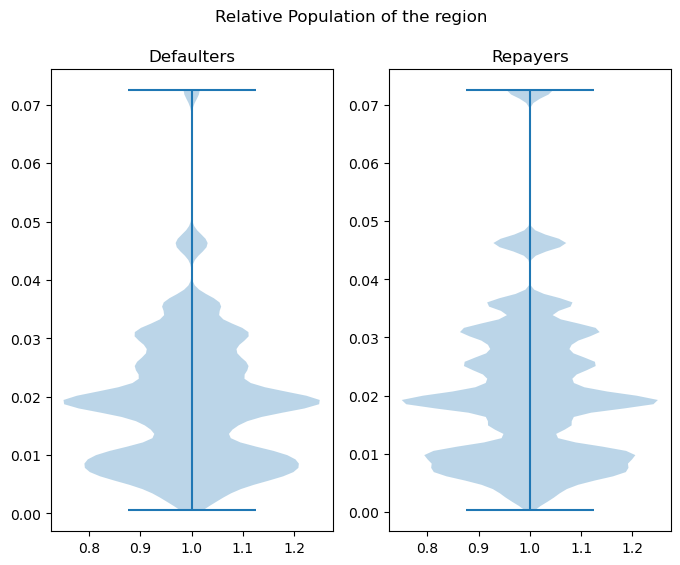

In [145]:
#Comparing the relative population of the defaulters and the repayers

plt.figure(figsize=(8,6))
defaulters_p=defaulters['REGION_POPULATION_RELATIVE']
plt.subplot(1,2,1)
plt.violinplot(defaulters_p)
plt.title("Defaulters")

repayers_p=repayers['REGION_POPULATION_RELATIVE']
plt.subplot(1,2,2)
plt.violinplot(repayers_p)
plt.title("Repayers")

plt.suptitle('Relative Population of the region')

Text(0.5, 1.0, 'Density plot for family members - repayers')

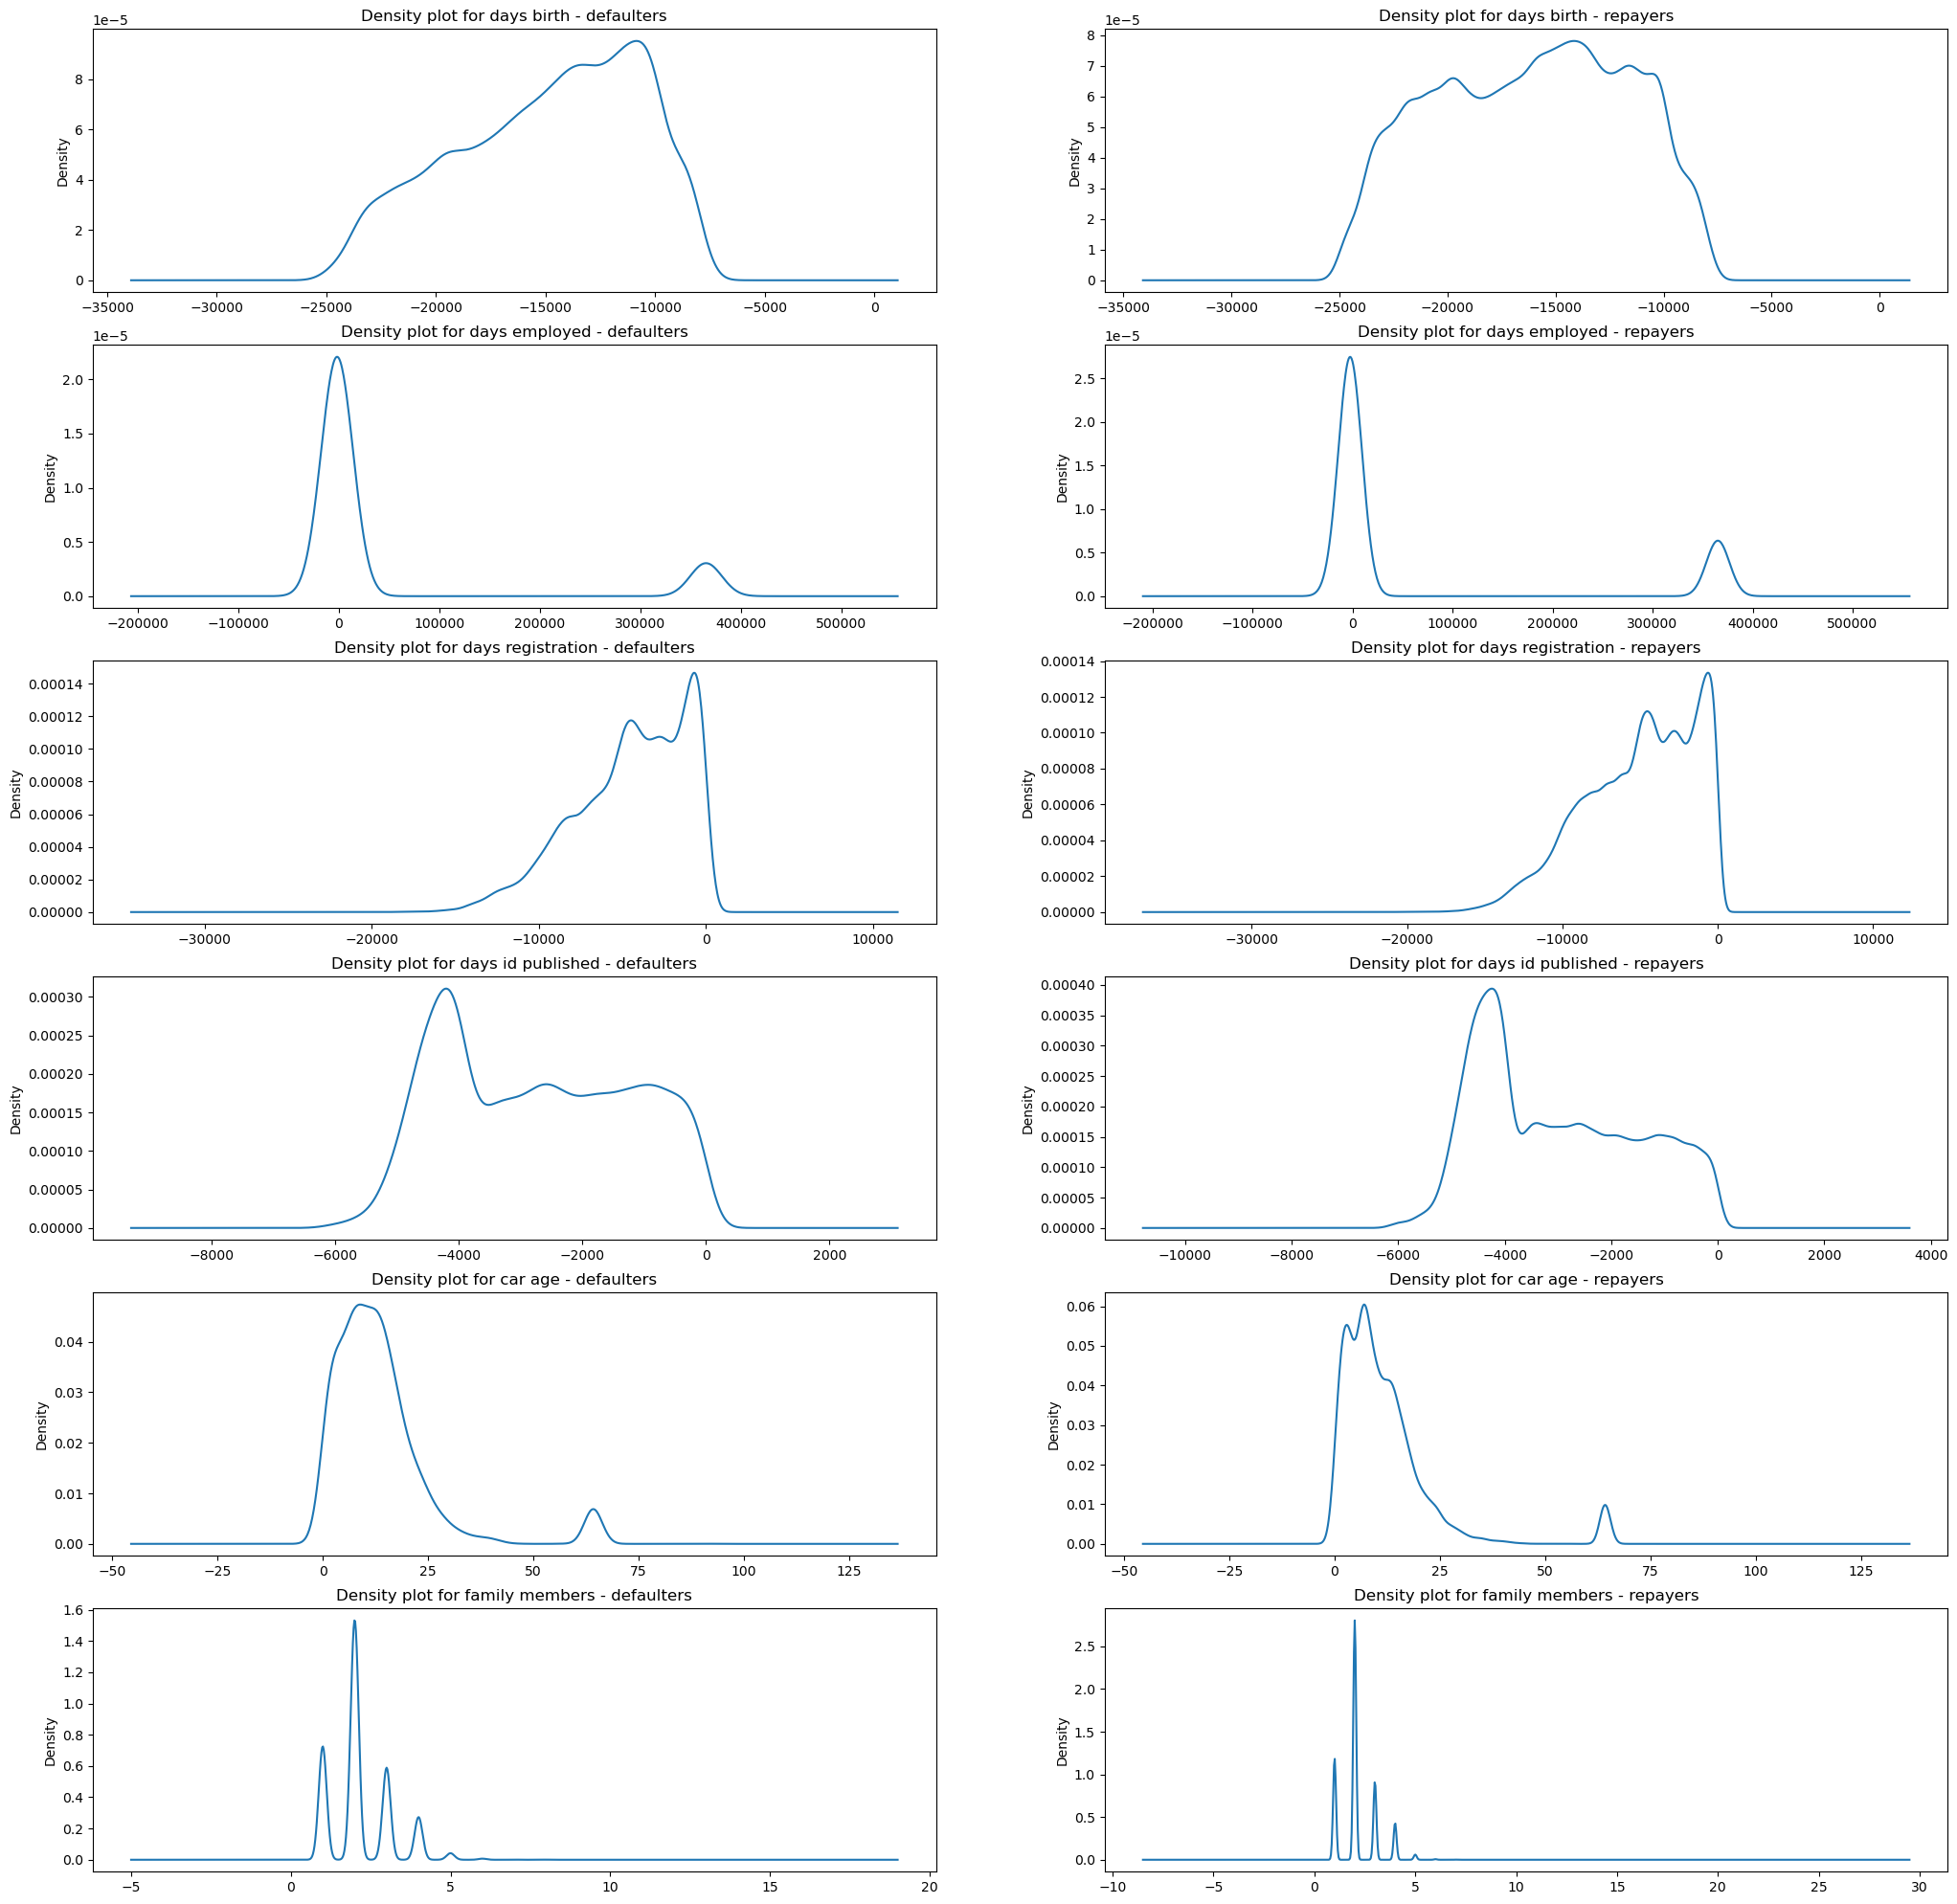

In [94]:
#Checking the distribution of applicants personal attributes for the loan repayers and defaulters

fig, axs = plt.subplots(6, 2,figsize=(25,25))

defaulters_db=defaulters['DAYS_BIRTH']
defaulters_db.plot.density(ax=axs[0,0])
axs[0,0].set_title("Density plot for days birth - defaulters")

repayers_db=repayers['DAYS_BIRTH']
repayers_db.plot.density(ax=axs[0,1])
axs[0,1].set_title("Density plot for days birth - repayers")

defaulters_de=defaulters['DAYS_EMPLOYED']
defaulters_de.plot.density(ax=axs[1,0])
axs[1,0].set_title("Density plot for days employed - defaulters")

repayers_de=repayers['DAYS_EMPLOYED']
repayers_de.plot.density(ax=axs[1,1])
axs[1,1].set_title("Density plot for days employed - repayers")

defaulters_reg=defaulters['DAYS_REGISTRATION']
defaulters_reg.plot.density(ax=axs[2,0])
axs[2,0].set_title("Density plot for days registration - defaulters")

repayers_reg=repayers['DAYS_REGISTRATION']
repayers_reg.plot.density(ax=axs[2,1])
axs[2,1].set_title("Density plot for days registration - repayers")

defaulters_id=defaulters['DAYS_ID_PUBLISH']
defaulters_id.plot.density(ax=axs[3,0])
axs[3,0].set_title("Density plot for days id published - defaulters")

repayers_id=repayers['DAYS_ID_PUBLISH']
repayers_id.plot.density(ax=axs[3,1])
axs[3,1].set_title("Density plot for days id published - repayers")

defaulters_ca=defaulters['OWN_CAR_AGE']
defaulters_ca.plot.density(ax=axs[4,0])
axs[4,0].set_title("Density plot for car age - defaulters")

repayers_ca=repayers['OWN_CAR_AGE']
repayers_ca.plot.density(ax=axs[4,1])
axs[4,1].set_title("Density plot for car age - repayers")

defaulters_fam=defaulters['CNT_FAM_MEMBERS']
defaulters_fam.plot.density(ax=axs[5,0])
axs[5,0].set_title("Density plot for family members - defaulters")

repayers_fam=repayers['CNT_FAM_MEMBERS']
repayers_fam.plot.density(ax=axs[5,1])
axs[5,1].set_title("Density plot for family members - repayers")

<AxesSubplot:xlabel='REGION_RATING_CLIENT'>

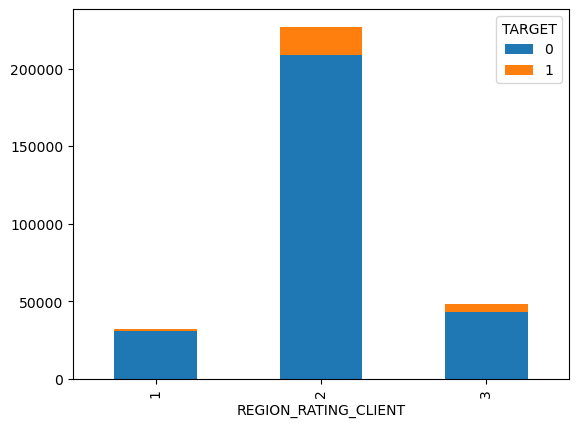

In [95]:
#Grouping the loan defaulters and repayers as per the target variable
reg_cli=app_data.groupby(['REGION_RATING_CLIENT','TARGET'])['TARGET'].count()
reg_cli.unstack().plot(kind="bar",stacked=True)

Text(0.5, 0.98, 'Living Situation')

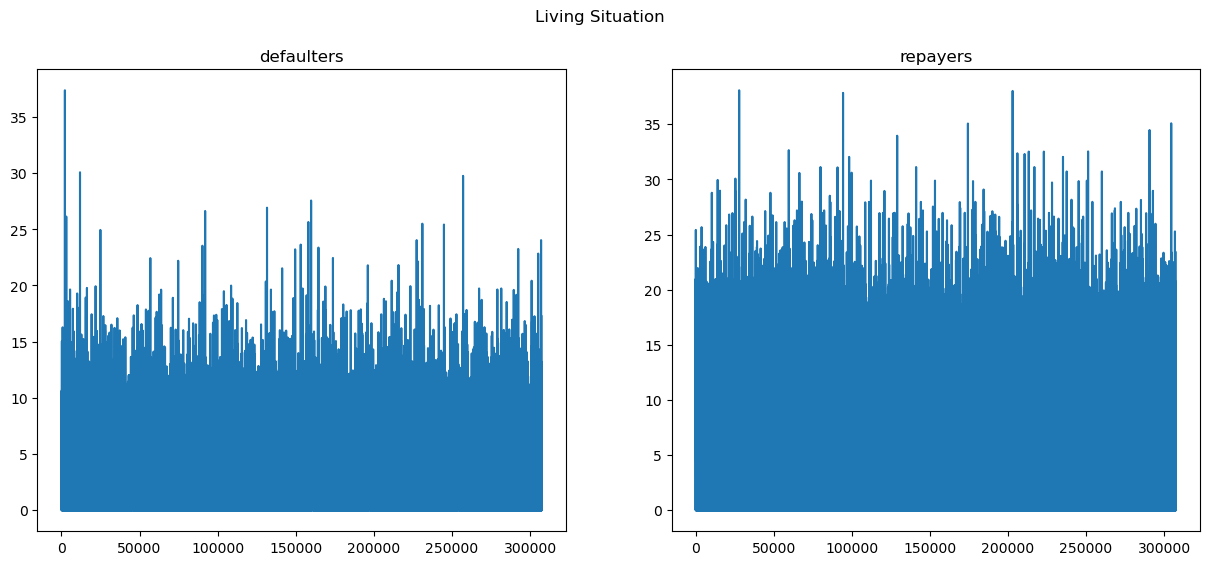

In [147]:
#Plotting the Living Situation distribution of the defaulters VS repayers

defaulters_ls=defaulters['Living Situation']
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(defaulters_ls)
plt.title('defaulters')

repayers_ls=repayers['Living Situation']
plt.subplot(1,2,2)
plt.plot(repayers_ls)
plt.title('repayers')

plt.suptitle('Living Situation')

In [97]:
#Checking for mean and median values of Living Situation of loan defaulters VS repayers

print("mean and median of defaulters living situation is ",round(defaulters_ls.mean(),2)," ",round(defaulters_ls.median(),2)," respectively")
print("mean and median of repayers living situation is ",round(repayers_ls.mean(),2)," ",round(repayers_ls.median(),2)," respectively")


mean and median of defaulters living situation is  3.28   0.0  respectively
mean and median of repayers living situation is  4.05   3.24  respectively


Text(0.5, 0.98, 'Doc Given')

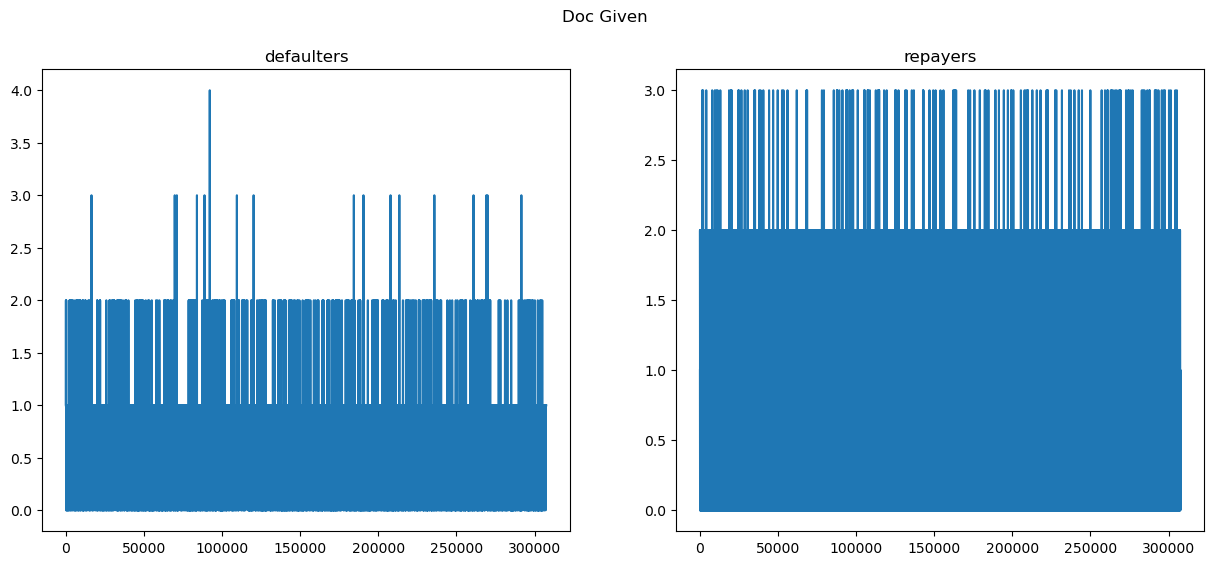

In [148]:
#Plotting the doc given distribution of the defaulters VS repayers

defaulters_dg=defaulters['doc given']
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(defaulters_dg)
plt.title('defaulters')

repayers_dg=repayers['doc given']
plt.subplot(1,2,2)
plt.plot(repayers_dg)
plt.title('repayers')

plt.suptitle('Doc Given')

Text(0.5, 1.0, 'Repayers')

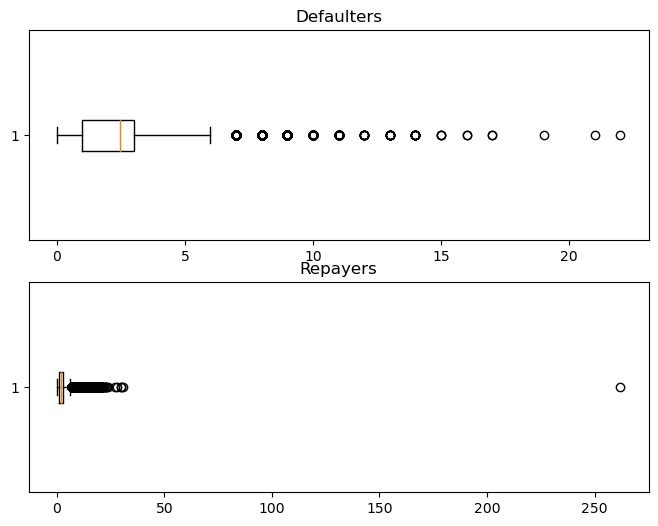

In [99]:
#Plotting the total enquiries distribution of the defaulters VS repayers

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
defaulters_cbh=defaulters['total enquiries']
plt.boxplot(defaulters_cbh,vert=False)
plt.title("Defaulters")

plt.subplot(2,1,2)
repayers_cbh=repayers['total enquiries']
plt.boxplot(repayers_cbh,vert=False)
plt.title("Repayers")

We can conclude the following from the EDA done above :
1. Defaulters for revolving loans is less.
2. Applicants who have realty asset, but don’t have cars have defaulted.
3. Defaulters fall in the region with rating 2.
4. Overall living situation for defaulters is less than 15 and for repayers is more than 20.
5. Overall docs given by defaulters is less than 2, whereas for repayers it is at least 2-3.
6. Children count for repayers have outliers.
7. Comparison of annuity amount and credited amount tells that the defaulters have a steeper relationship compared to repayers.
8. The credit amount comparison with the goods price for which the loan is requested, suggest that repayers have outliers.
9. The overall credit bureau enquiries suggest that there are outliers in repayers.
10. The loan term offered to approved applicants have smaller range, but has more outliers.
11. Yield group for approved applicants is middle/high and for refused applicants is low/middle.

In [100]:
#Finding the Top 10 10 features in the current applicants data correlated to the target variable 

corr_matrix = app_data.corr(method='pearson').round(2)
top_corr_features = corr_matrix.nlargest(10, 'TARGET')['TARGET'].index.tolist()
top_corr_matrix = corr_matrix.loc[top_corr_features, top_corr_features]

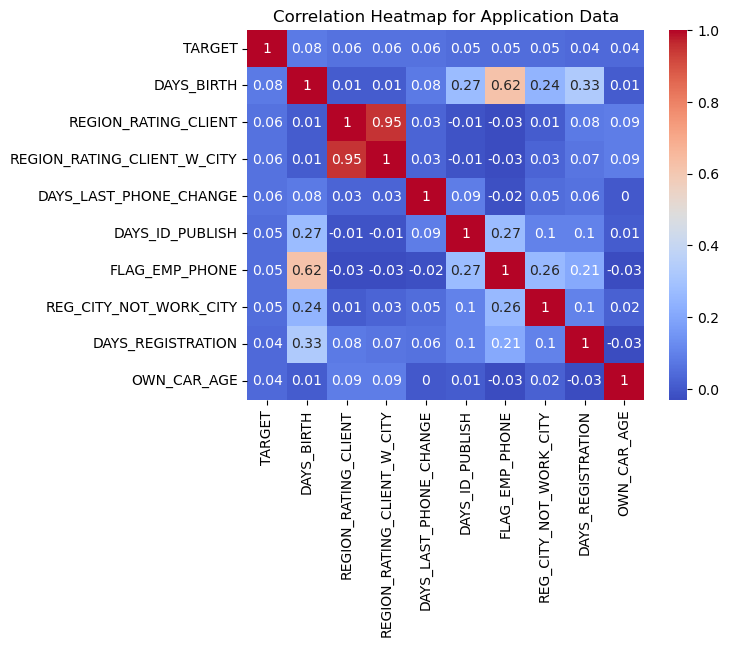

In [101]:
#Heatmap of the top correlated features depicting the correlation value

sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Application Data')
plt.show()

Below I am checking for null values, missing values, duplicate values in the previous application data and taking the appropriate action to clean the data as described in the steps below.

In [102]:
#Checking for duplicate IDs in the previous application data

dup_ids1=pre_app_data[pre_app_data.duplicated('SK_ID_PREV')]
print("duplicate prev ids :",dup_ids1['SK_ID_PREV'].count())
dup_ids2=pre_app_data[pre_app_data.duplicated('SK_ID_CURR')]
print("% of duplicate current ids :",round(dup_ids2['SK_ID_CURR'].count()/len(pre_app_data['SK_ID_CURR'])*100,2))

duplicate prev ids : 0
% of duplicate current ids : 79.71


In [103]:
#Checking for null values in previous applicants data

print("% of null values :")
print((pre_app_data.isnull().sum()/len(pre_app_data))*100)
perc=(pre_app_data.isnull().sum()/len(pre_app_data))*100

% of null values :
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.0000

In [104]:
#replacing the null values with mean values

pre_app_data['AMT_ANNUITY'].fillna(pre_app_data['AMT_ANNUITY'].mean(),inplace=True)
pre_app_data['AMT_DOWN_PAYMENT'].fillna(pre_app_data['AMT_DOWN_PAYMENT'].mean(),inplace=True)
pre_app_data['AMT_GOODS_PRICE'].fillna(pre_app_data['AMT_GOODS_PRICE'].mean(),inplace=True)
pre_app_data['RATE_DOWN_PAYMENT'].fillna(pre_app_data['RATE_DOWN_PAYMENT'].mean(),inplace=True)
pre_app_data['RATE_INTEREST_PRIMARY'].fillna(pre_app_data['RATE_INTEREST_PRIMARY'].mean(),inplace=True)
pre_app_data['CNT_PAYMENT'].fillna(pre_app_data['CNT_PAYMENT'].mean(),inplace=True)
pre_app_data['DAYS_FIRST_DRAWING'].fillna(pre_app_data['DAYS_FIRST_DRAWING'].mean(),inplace=True)
pre_app_data['DAYS_FIRST_DUE'].fillna(pre_app_data['DAYS_FIRST_DUE'].mean(),inplace=True)
pre_app_data['DAYS_LAST_DUE_1ST_VERSION'].fillna(pre_app_data['DAYS_LAST_DUE_1ST_VERSION'].mean(),inplace=True)
pre_app_data['DAYS_LAST_DUE'].fillna(pre_app_data['DAYS_LAST_DUE'].mean(),inplace=True)
pre_app_data['DAYS_TERMINATION'].fillna(pre_app_data['DAYS_TERMINATION'].mean(),inplace=True)
pre_app_data['NFLAG_INSURED_ON_APPROVAL'].fillna(pre_app_data['NFLAG_INSURED_ON_APPROVAL'].mean(),inplace=True)

In [105]:
#Checking for % null values after replacing 

(pre_app_data.isnull().sum()/len(pre_app_data))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT                0.000000
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT               0.000000
RATE_INTEREST_PRIMARY           0.000000
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

Next steps would be to find the distribution of variables, outliers if any, their relationship with the application status variable.I have narrowed down the analysis my focusing only on the applications which were approved or refused.

<AxesSubplot:>

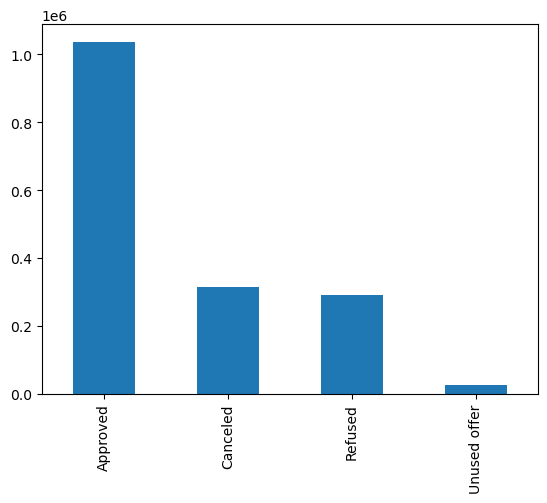

In [106]:
#Checking for the previous applications status distribution

status_dis=pre_app_data['NAME_CONTRACT_STATUS'].value_counts()
status_dis.plot(kind="bar")

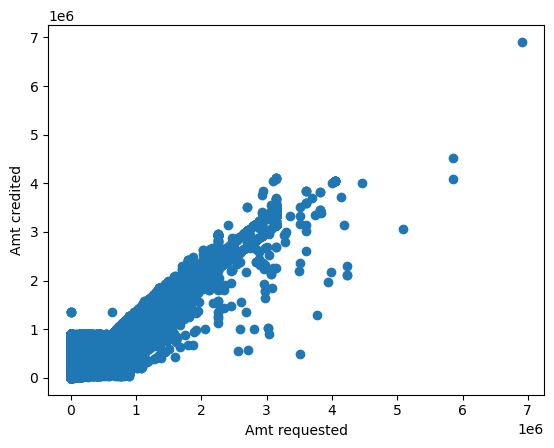

In [107]:
#Plotting the relationship between the amount requested and amount credit in the previous applications

plt.scatter(pre_app_data['AMT_APPLICATION'],pre_app_data['AMT_CREDIT'])
plt.xlabel('Amt requested')
plt.ylabel('Amt credited')
plt.show()

<AxesSubplot:>

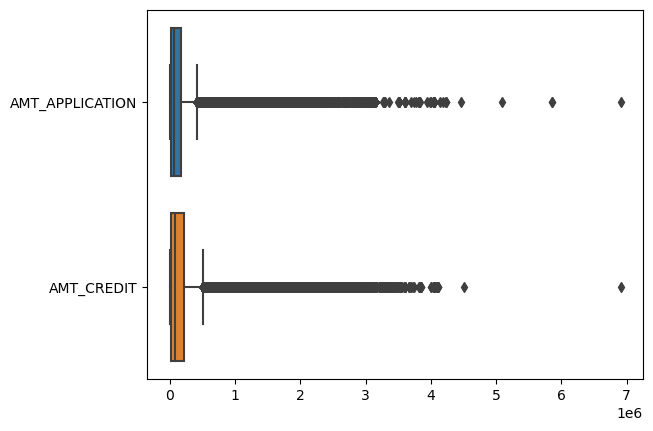

In [108]:
#Plotting the outliers in amount requested and amount credit in the previous applications

sns.boxplot(data=pre_app_data[['AMT_APPLICATION','AMT_CREDIT']],orient='h')

In [109]:
#Finding outliers in the amount requested and amount credit in the previous applications using Interquartile range method

q1_amt_app = pre_app_data['AMT_APPLICATION'].quantile(.25)   #q1 of the loan amount requested
q3_amt_app = pre_app_data['AMT_APPLICATION'].quantile(.75)   #q3 of the loan amount requested
iqr_amt_app = q3_amt_app-q1_amt_app       #interquartile range of the loan amount requested

lb_amt_app = q1_amt_app - 1.5*(iqr_amt_app)   #lower limit of the loan amount requested
ub_amt_app = q3_amt_app + 1.5*(iqr_amt_app)   #upper limit of the loan amount requested

q1_amt_credit = pre_app_data['AMT_CREDIT'].quantile(.25)   #q1 of the amount credited
q3_amt_credit = pre_app_data['AMT_CREDIT'].quantile(.75)   #q3 of the amount credited
iqr_amt_credit = q3_amt_credit-q1_amt_credit    #interquartile range of the amount credited

lb_amt_credit = q1_amt_credit - 1.5*(iqr_amt_credit)  #lower limit of the amount credited
ub_amt_credit = q3_amt_credit + 1.5*(iqr_amt_credit)  #upper limit of the amount credited

#Finding the outliers in the amount requested and amount credited
pre_out = pre_app_data[(pre_app_data['AMT_APPLICATION'].gt(ub_amt_app) | pre_app_data['AMT_APPLICATION'].lt(lb_amt_app)) & (pre_app_data['AMT_CREDIT'].gt(ub_amt_credit) | pre_app_data['AMT_CREDIT'].lt(lb_amt_credit))]
print("Outliers count",len(pre_out))
print("% outliers for amt requested vs amt credited:",(len(pre_out)/len(pre_app_data))*100)

Outliers count 173382
% outliers for amt requested vs amt credited: 10.380825451109859


<AxesSubplot:>

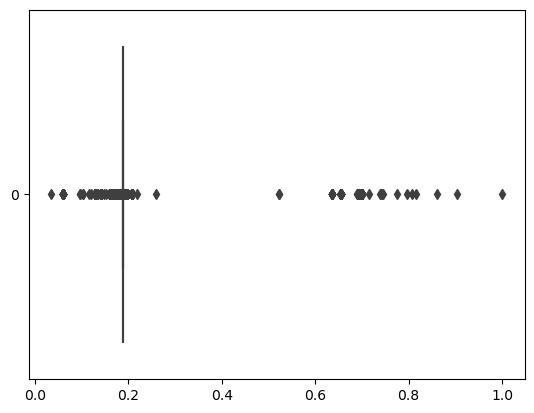

In [110]:
#Distribution of the primary interest rate of the previous applicants data

sns.boxplot(data=pre_app_data['RATE_INTEREST_PRIMARY'],orient="h")

In [111]:
#Finding the outliers in the primary rate of interest using Interquartile range

q1_int = pre_app_data['RATE_INTEREST_PRIMARY'].quantile(.25)  #q1 of the primary rate of interest
q3_int = pre_app_data['RATE_INTEREST_PRIMARY'].quantile(.75)  #q3 of the primary rate of interest
iqr_int = q3_int-q1_int  #interquartile range of the primary rate of interest

lb_int = q1_int - 1.5*(iqr_int)  #lower limit of the primary rate of interest
ub_int = q3_int + 1.5*(iqr_int)  #upper limit of the primary rate of interest

#outliers of the primary rate of interest
int_out = pre_app_data[(pre_app_data['RATE_INTEREST_PRIMARY'].gt(ub_int) | pre_app_data['RATE_INTEREST_PRIMARY'].lt(lb_int))]
print("Outliers count of Interest rate :",len(int_out))
print("% outliers of Interest rate :",(len(int_out)/len(pre_app_data))*100)

Outliers count of Interest rate : 5951
% outliers of Interest rate : 0.35630164757330496


In [112]:
#Finding the outliers in the down payment rate using Interquartile range

q1_dp = pre_app_data['RATE_DOWN_PAYMENT'].quantile(.25) #q1 of the down payment rate
q3_dp = pre_app_data['RATE_DOWN_PAYMENT'].quantile(.75) #q3 of the down payment rate
iqr_dp = q3_dp-q1_dp   #interquartile range of the down payment rate

lb_dp = q1_dp - 1.5*(iqr_dp)   #lower limit of the down payment rate
ub_dp = q3_dp + 1.5*(iqr_dp)   #upper limit of the down payment rate

#outliers in the down payment rate
dp_out = pre_app_data[(pre_app_data['RATE_DOWN_PAYMENT'].gt(ub_dp) | pre_app_data['RATE_DOWN_PAYMENT'].lt(lb_dp))]
print("Outliers count of down payment rate :",len(dp_out))
print("% outliers of down payment rate :",(len(dp_out)/len(pre_app_data))*100)

Outliers count of down payment rate : 774370
% outliers of down payment rate : 46.363519884278304


{'whiskers': [<matplotlib.lines.Line2D at 0x78f4310538d0>,
 'caps': [<matplotlib.lines.Line2D at 0x78f431053990>,
 'boxes': [<matplotlib.lines.Line2D at 0x78f431053d90>],
 'medians': [<matplotlib.lines.Line2D at 0x78f438362510>],
 'fliers': [<matplotlib.lines.Line2D at 0x78f4383f28d0>],
 'means': []}

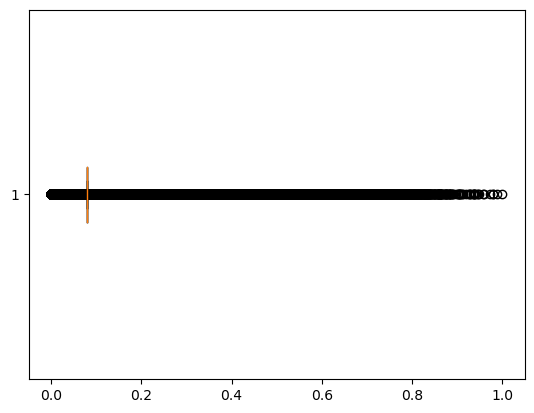

In [113]:
#distribution of the down payment rate

plt.boxplot(pre_app_data['RATE_DOWN_PAYMENT'],vert=False)

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE'>

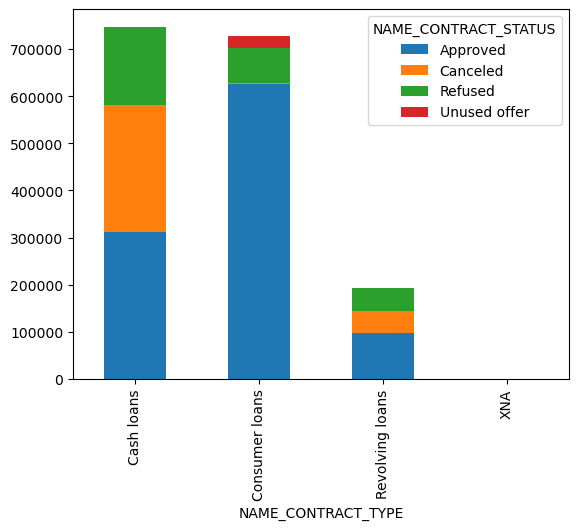

In [114]:
#Plotting the type of loan and the status of the previous application

type_dis=pre_app_data.groupby(['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS'])['SK_ID_PREV'].count()
type_dis.unstack().plot(kind="bar",stacked=True)

In [115]:
#all the applicants whose previous applications were refused
refused_pre_app=pre_app_data[pre_app_data['NAME_CONTRACT_STATUS'] == 'Refused']

#all the applicants whose previous applications were approved
appr_pre_app=pre_app_data[pre_app_data['NAME_CONTRACT_STATUS'] == 'Approved']

Text(0.5, 1.0, 'Approved')

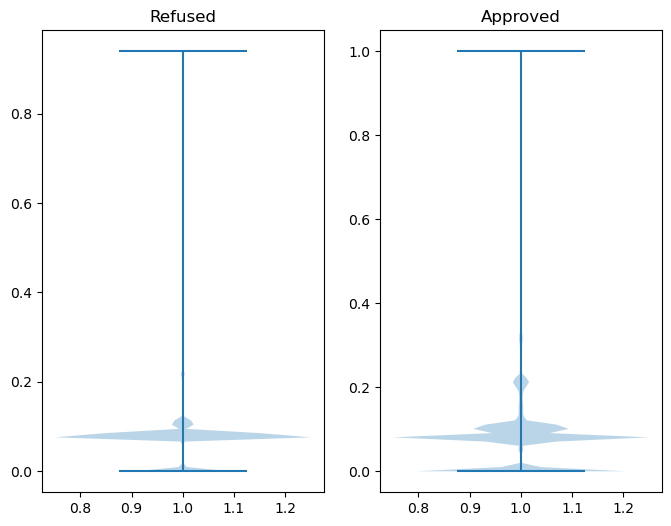

In [116]:
#Comparing the down payment rate of the applicants whose loans were refused and approved

plt.figure(figsize=(8,6))
ref_rdp=refused_pre_app['RATE_DOWN_PAYMENT']
plt.subplot(1,2,1)
plt.violinplot(ref_rdp)
plt.title("Refused")

appr_rdp=appr_pre_app['RATE_DOWN_PAYMENT']
plt.subplot(1,2,2)
plt.violinplot(appr_rdp)
plt.title("Approved")

Text(0.5, 1.0, 'Approved')

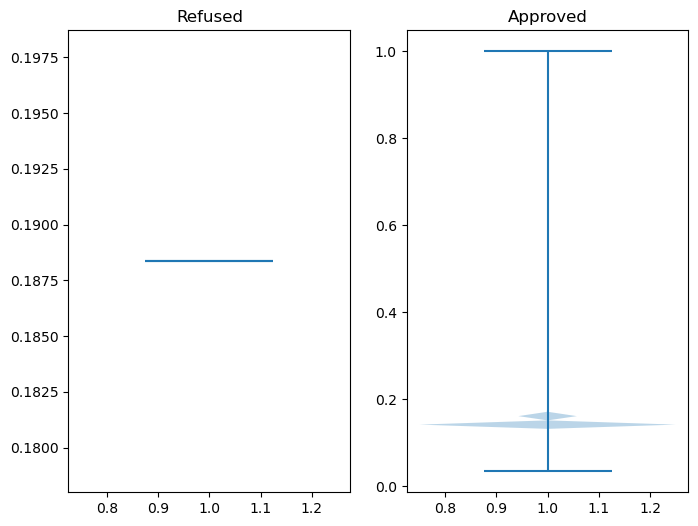

In [117]:
#Comparing the primary interest rate of the applicants whose loans were refused and approved

plt.figure(figsize=(8,6))
ref_int=refused_pre_app['RATE_INTEREST_PRIMARY']
plt.subplot(1,2,1)
plt.violinplot(ref_int)
plt.title("Refused")

appr_int=appr_pre_app['RATE_INTEREST_PRIMARY']
plt.subplot(1,2,2)
plt.violinplot(appr_int)
plt.title("Approved")

Text(0.5, 0.98, 'Top 10 Cash Loan Purposes')

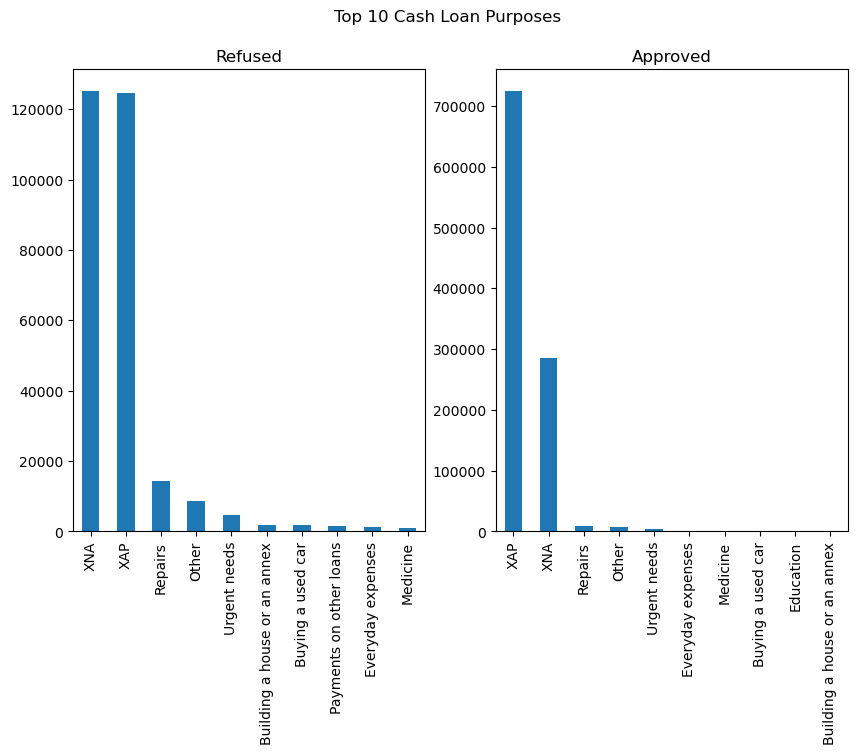

In [118]:
#Top 10 reasons purposes for the previously loan was applied by applicants whose loan was refused and approved

ref_pur=refused_pre_app['NAME_CASH_LOAN_PURPOSE'].value_counts().head(10)
appr_pur=appr_pre_app['NAME_CASH_LOAN_PURPOSE'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
ref_pur.plot(kind="bar")
plt.title("Refused")

plt.subplot(1,2,2)
appr_pur.plot(kind="bar")
plt.title("Approved")

plt.suptitle("Top 10 Cash Loan Purposes")

Text(0.5, 0.98, 'Relative days between decision about prev application')

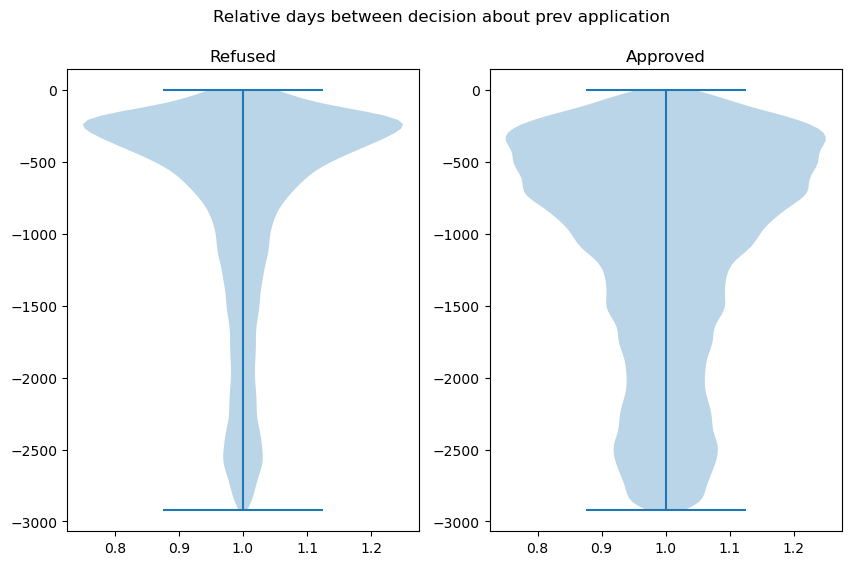

In [119]:
#relative days between when the previous application and current application
#Comparing the values of applicants with reused and approved loan status

ref_days=refused_pre_app['DAYS_DECISION']
appr_days=appr_pre_app['DAYS_DECISION']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.violinplot(ref_days)
plt.title("Refused")

plt.subplot(1,2,2)
plt.violinplot(appr_days)
plt.title("Approved")

plt.suptitle("Relative days between decision about prev application")

In [120]:
#Checking for application refusal code

refused_pre_app['CODE_REJECT_REASON'].value_counts()

HC        175231
LIMIT      55680
SCO        37467
SCOFR      12811
XNA         5236
VERIF       3535
SYSTEM       717
XAP            1
Name: CODE_REJECT_REASON, dtype: int64

Text(0.5, 0.98, 'Person Accompanied')

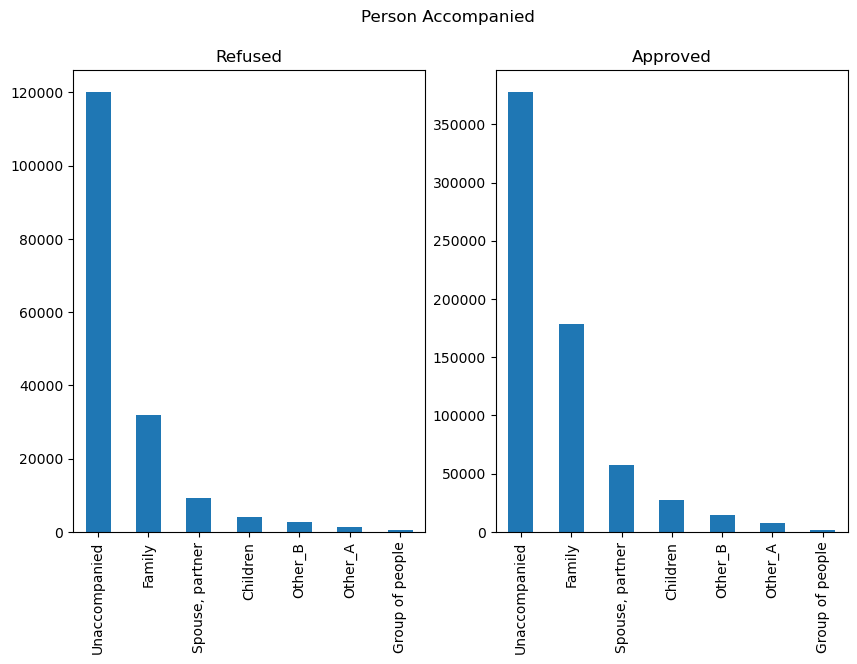

In [121]:
#Plotting the person accompained the applicant for refused and approved applications

ref_acc=refused_pre_app['NAME_TYPE_SUITE'].value_counts()
appr_acc=appr_pre_app['NAME_TYPE_SUITE'].value_counts()

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
ref_acc.plot(kind="bar")
plt.title("Refused")

plt.subplot(1,2,2)
appr_acc.plot(kind="bar")
plt.title("Approved")
plt.suptitle("Person Accompanied")


Text(0.5, 0.98, 'Reoccuring Client')

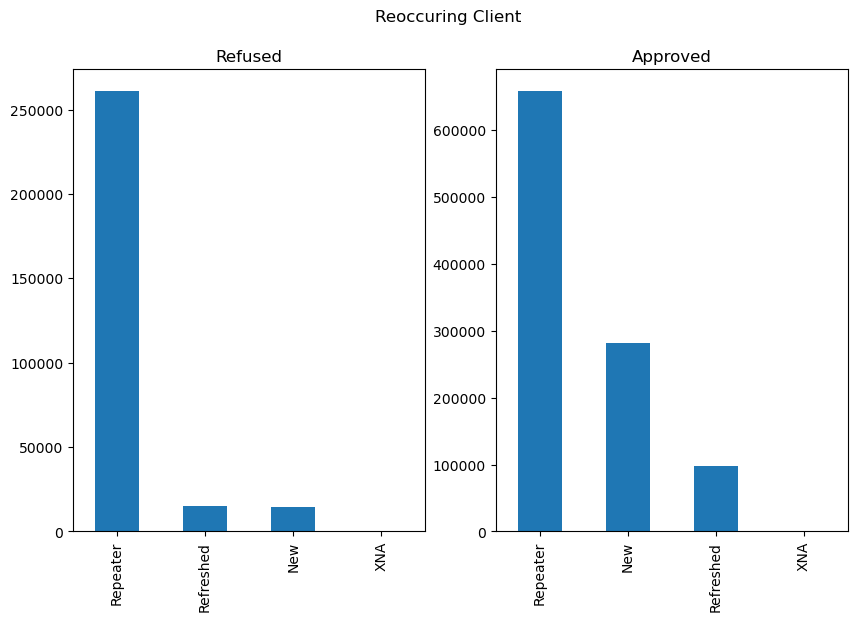

In [122]:
#Checking the reocurring frequency of the refused and approved applicants

ref_cli_type=refused_pre_app['NAME_CLIENT_TYPE'].value_counts()
appr_cli_type=appr_pre_app['NAME_CLIENT_TYPE'].value_counts()

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
ref_cli_type.plot(kind="bar")
plt.title("Refused")

plt.subplot(1,2,2)
appr_cli_type.plot(kind="bar")
plt.title("Approved")
plt.suptitle("Reoccuring Client")

Text(0.5, 0.98, 'Top 10 Goods Category')

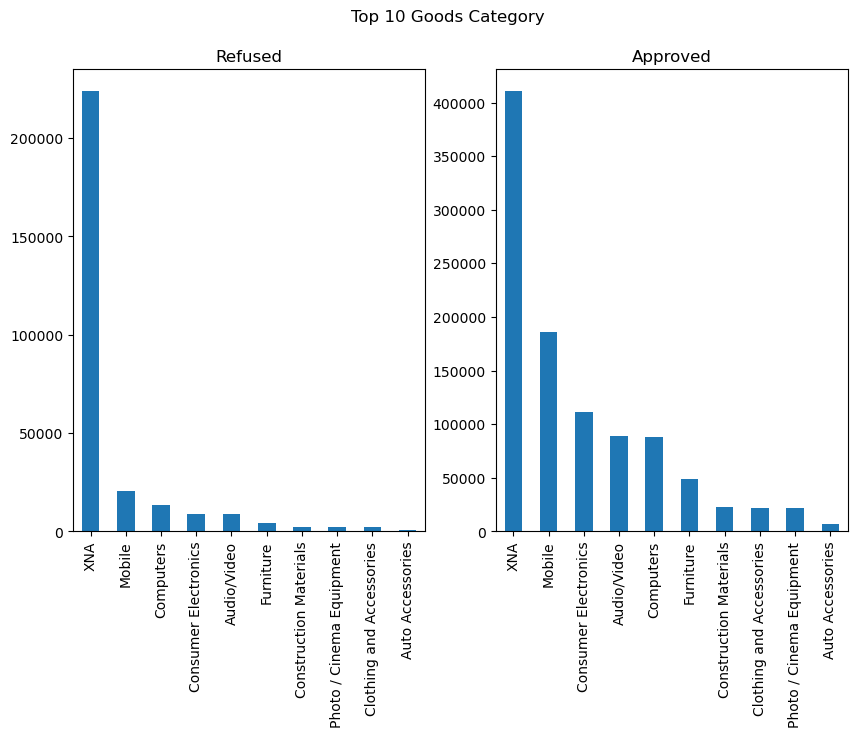

In [123]:
#Checking the top 10 goods category for which the loan was requested for the applicants with approved and refused status

ref_goods=refused_pre_app['NAME_GOODS_CATEGORY'].value_counts().head(10)
appr_goods=appr_pre_app['NAME_GOODS_CATEGORY'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
ref_goods.plot(kind="bar")
plt.title("Refused")

plt.subplot(1,2,2)
appr_goods.plot(kind="bar")
plt.title("Approved")
plt.suptitle("Top 10 Goods Category")

Text(0.5, 0.98, 'Portfolio')

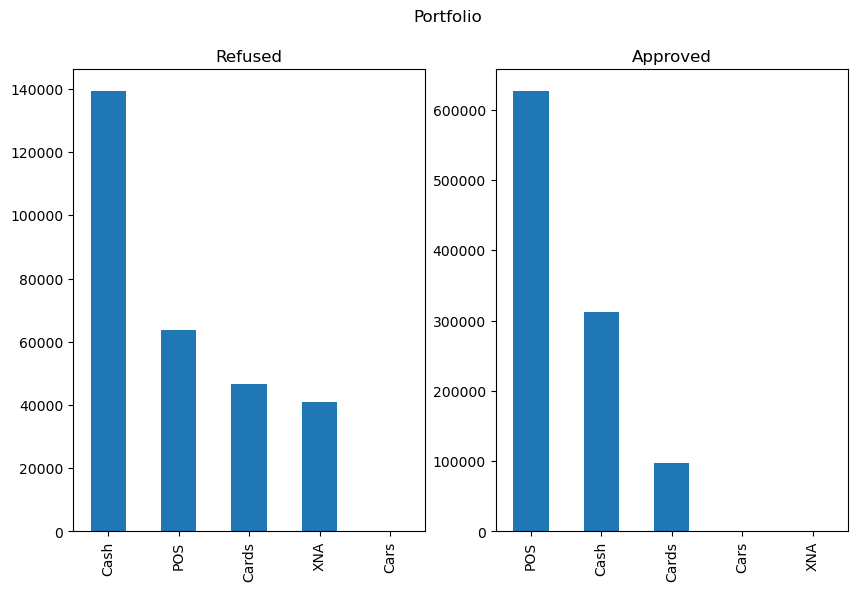

In [124]:
#Checking the portfolio name of the refused and approved applicants

ref_port=refused_pre_app['NAME_PORTFOLIO'].value_counts()
appr_port=appr_pre_app['NAME_PORTFOLIO'].value_counts()

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
ref_port.plot(kind="bar")
plt.title("Refused")

plt.subplot(1,2,2)
appr_port.plot(kind="bar")
plt.title("Approved")
plt.suptitle("Portfolio")

Text(0.5, 0.98, 'Channel Acquired')

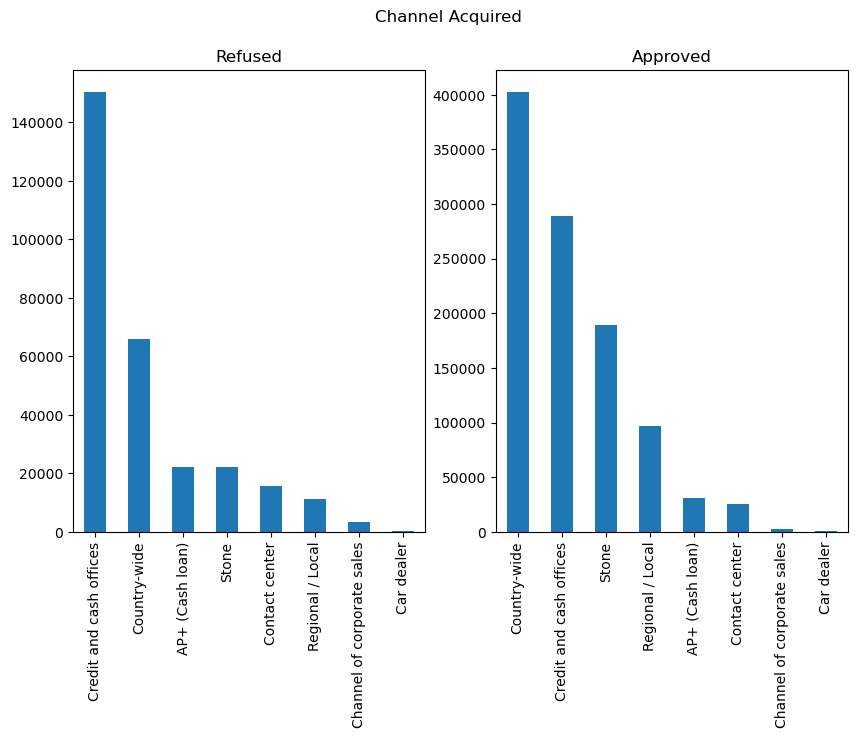

In [125]:
#Checking the channel type of the refused and approved applicants

ref_chn=refused_pre_app['CHANNEL_TYPE'].value_counts()
appr_chn=appr_pre_app['CHANNEL_TYPE'].value_counts()

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
ref_chn.plot(kind="bar")
plt.title("Refused")

plt.subplot(1,2,2)
appr_chn.plot(kind="bar")
plt.title("Approved")
plt.suptitle("Channel Acquired")

Text(0.5, 1.0, 'Approved')

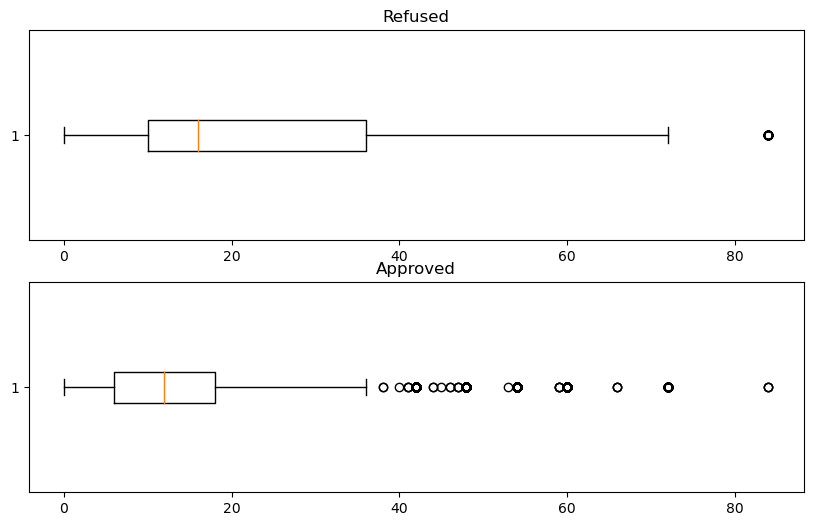

In [126]:
#Checking the no. of loan payments done by of refused and approved applicants

appr_cnt=appr_pre_app['CNT_PAYMENT']
ref_cnt=refused_pre_app['CNT_PAYMENT']

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.boxplot(ref_cnt,vert=False)
plt.title("Refused")

plt.subplot(2,1,2)
plt.boxplot(appr_cnt,vert=False)
plt.title("Approved")

Text(0.5, 1.0, 'Yield Group for Approved Applicants')

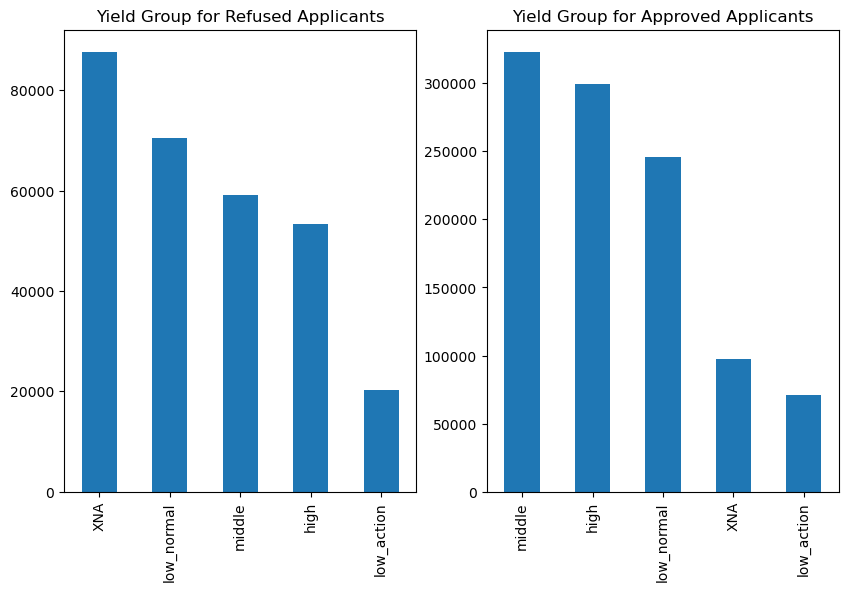

In [127]:
#Checking the yield group name of the refused and approved applicants

plt.figure(figsize=(10,6))
ref_nyg=refused_pre_app['NAME_YIELD_GROUP'].value_counts()
appr_nyg=appr_pre_app['NAME_YIELD_GROUP'].value_counts()

plt.subplot(1,2,1)
ref_nyg.plot(kind="bar")
plt.title("Yield Group for Refused Applicants")

plt.subplot(1,2,2)
appr_nyg.plot(kind="bar")
plt.title("Yield Group for Approved Applicants")

Text(0.5, 0.98, 'Top 5 Product Combination')

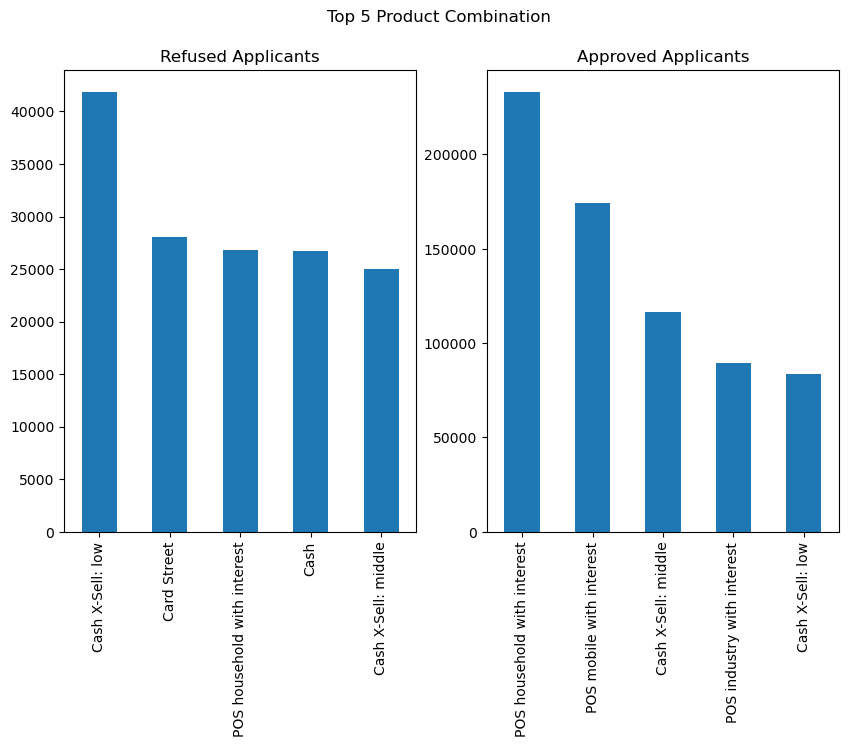

In [128]:
#Checking the product combination of the refused and approved applicants

plt.figure(figsize=(10,6))
ref_pc=refused_pre_app['PRODUCT_COMBINATION'].value_counts().head(5)
appr_pc=appr_pre_app['PRODUCT_COMBINATION'].value_counts().head(5)

plt.subplot(1,2,1)
ref_pc.plot(kind="bar")
plt.title("Refused Applicants")

plt.subplot(1,2,2)
appr_pc.plot(kind="bar")
plt.title("Approved Applicants")

plt.suptitle("Top 5 Product Combination")

In [129]:
#Checking for top 10 correlated features in the previous loan applicants data

pre_corr_matrix=pre_app_data.corr(method='pearson').round(2)
pre_feat=pre_corr_matrix.nlargest(10,'SK_ID_PREV').index.tolist()
pre_corr_matrix=pre_corr_matrix.loc[pre_feat,pre_feat]

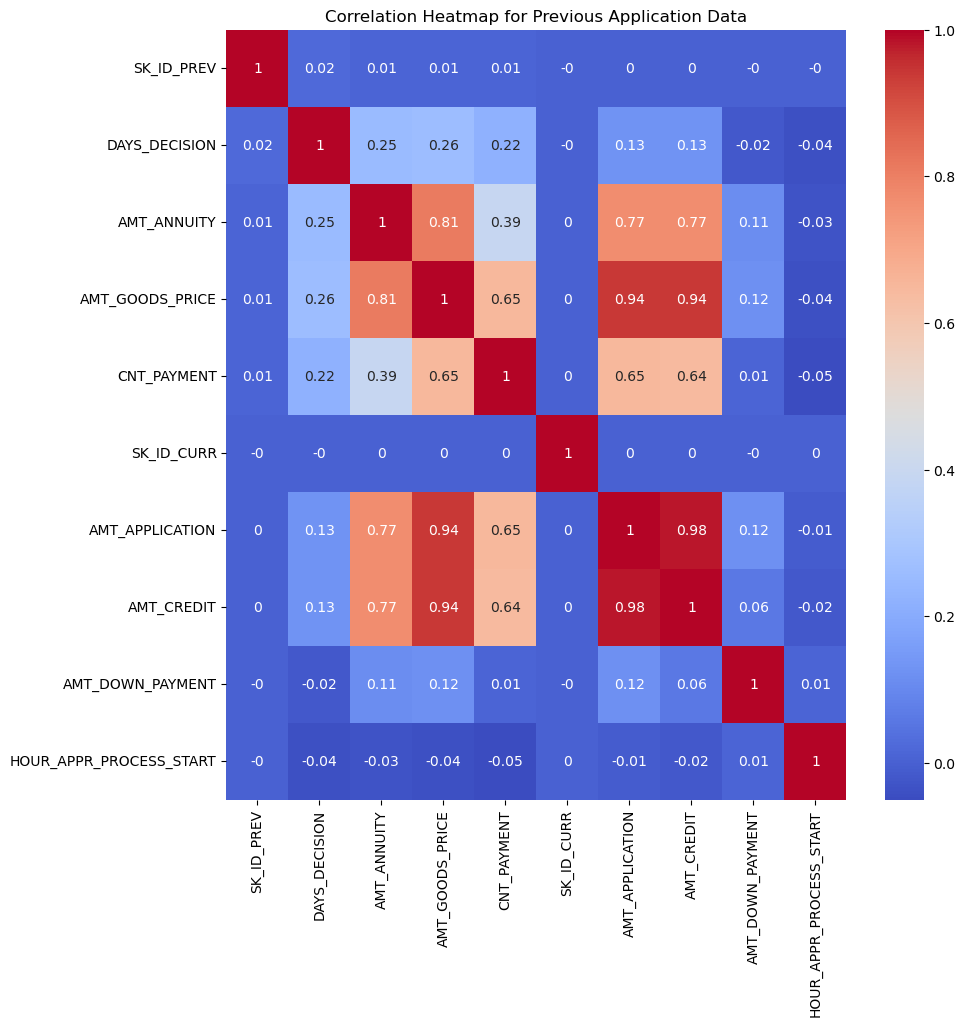

In [130]:
#Plotting heatmap of the Top 10 correlated features

plt.figure(figsize=(10,10))
sns.heatmap(pre_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Previous Application Data')
plt.show()

Inorder to confirm the observations derived through EDA, I have created 2 subplots in the data with the following categories of applicants – Loan previously approved, but the applicant has turned defaulter, Loan previously refused but the applicant has turned repayer.
I then checked if the observations found in EDA are confirmed by these two subplots of the data.

In [131]:
#Checking for the IDs in the cuurent applications data which were previously refused

refused_app=pre_app_data[pre_app_data['NAME_CONTRACT_STATUS'] == 'Refused'].groupby('SK_ID_CURR')['SK_ID_PREV'].count().sort_values(ascending=False)
sk_id_curr_ref_values = refused_app.index.tolist()

In [132]:
#Checking for the IDs in the current applications data which were previously approved

approved_app=pre_app_data[pre_app_data['NAME_CONTRACT_STATUS'] == 'Approved'].groupby('SK_ID_CURR')['SK_ID_PREV'].count().sort_values(ascending=False)
curr_id_app_values=approved_app.index.tolist()

In [133]:
#previous application details where current IDs previously approved
approved_prev_ids = pre_app_data[pre_app_data['SK_ID_CURR'].isin(curr_id_app_values)]

#current application details where current IDs previously approved
approved_curr_ids = app_data[app_data['SK_ID_CURR'].isin(curr_id_app_values)]

In [134]:
#previous application details where current IDs previously refused
refused_prev_ids = pre_app_data[pre_app_data['SK_ID_CURR'].isin(sk_id_curr_ref_values)]

#current application details where current IDs previously refused
refused_curr_ids = app_data[app_data['SK_ID_CURR'].isin(sk_id_curr_ref_values)]

In [135]:
#previously refused and approved applications
prev_ref=pre_app_data[pre_app_data['NAME_CONTRACT_STATUS'] == 'Refused']
prev_appr=pre_app_data[pre_app_data['NAME_CONTRACT_STATUS'] == 'Approved']

In [136]:
#current loan repayers, whose previous applications where approved
repayers_approved=approved_curr_ids[approved_curr_ids['TARGET']==0]

#current loan defaulters, whose previous applications where refused
defaulters_refused=refused_curr_ids[refused_curr_ids['TARGET']==1]

#need to avoid below two segments
#current loan defaulters, whose previous applications where approved
defaulters_approved=approved_curr_ids[approved_curr_ids['TARGET']==1] 

#current loan repayers, whose previous applications where refused
repayers_refused=refused_curr_ids[refused_curr_ids['TARGET']==0]

Below, I am comparing the two segments that we need to avoid with the observations drawn through EDA

Text(0.5, 0.98, 'Type of Loan')

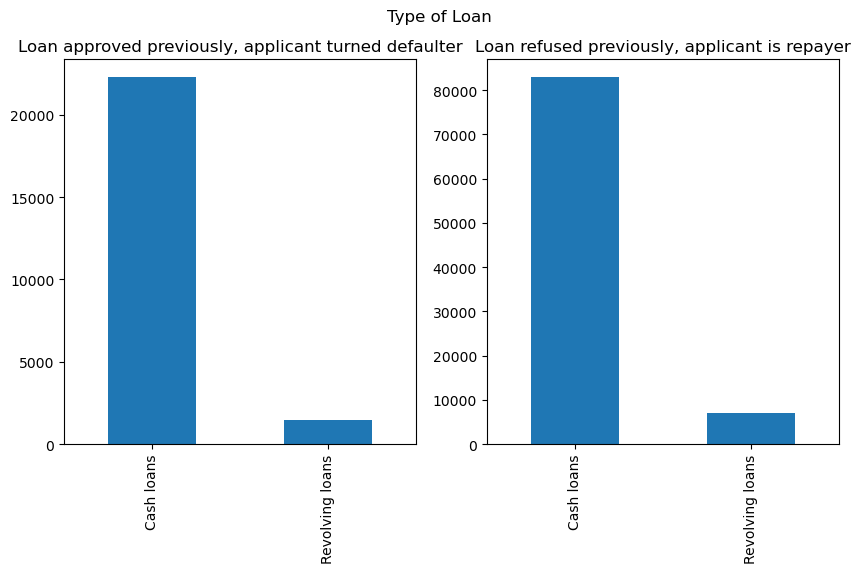

In [137]:
#Comapring the contract type

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
defaulters_approved['NAME_CONTRACT_TYPE'].value_counts().plot(kind="bar")
plt.title("Loan approved previously, applicant turned defaulter")
plt.subplot(1,2,2)
repayers_refused['NAME_CONTRACT_TYPE'].value_counts().plot(kind="bar")
plt.title("Loan refused previously, applicant is repayer")

plt.suptitle("Type of Loan")

In [138]:
#Comparing the car and realty ownership
flat_no_car1=defaulters_approved[defaulters_approved['FLAG_OWN_REALTY'].eq('Y') & defaulters_approved['FLAG_OWN_CAR'].eq('N')]
print("% of Defaulters previously approved who have flat, but no car :",round((len(flat_no_car1)/len(defaulters_approved))*100),2)

flat_no_car2=repayers_refused[repayers_refused['FLAG_OWN_REALTY'].eq('Y') & repayers_refused['FLAG_OWN_CAR'].eq('N')]
print("% of Repayers previously refused who have flat, but no car :",round((len(flat_no_car2)/len(repayers_refused))*100,2))

% of Defaulters previously approved who have flat, but no car : 48 2
% of Repayers previously refused who have flat, but no car : 46.47


Text(0.5, 0.98, 'Relative region population')

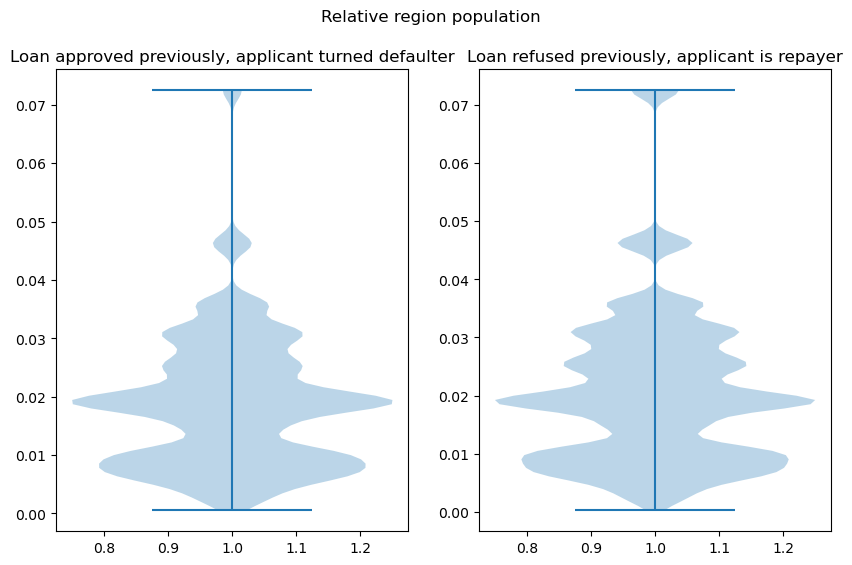

In [139]:
#Comparing the relative region population

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.violinplot(defaulters_approved['REGION_POPULATION_RELATIVE'])
plt.title("Loan approved previously, applicant turned defaulter")

plt.subplot(1,2,2)
plt.violinplot(repayers_refused['REGION_POPULATION_RELATIVE'])
plt.title("Loan refused previously, applicant is repayer")

plt.suptitle("Relative region population")

Text(0.5, 0.98, 'Relative Birth Day')

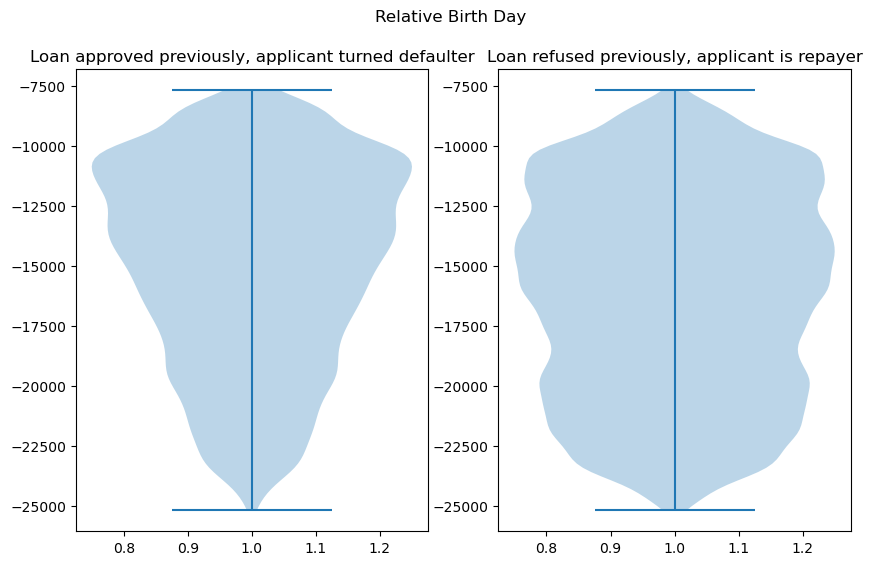

In [140]:
#Comparing the relative age from the application submitted

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.violinplot(defaulters_approved['DAYS_BIRTH'])
plt.title("Loan approved previously, applicant turned defaulter")

plt.subplot(1,2,2)
plt.violinplot(repayers_refused['DAYS_BIRTH'])
plt.title("Loan refused previously, applicant is repayer")

plt.suptitle("Relative Birth Day")

Text(0.5, 0.98, 'Client Region Rating')

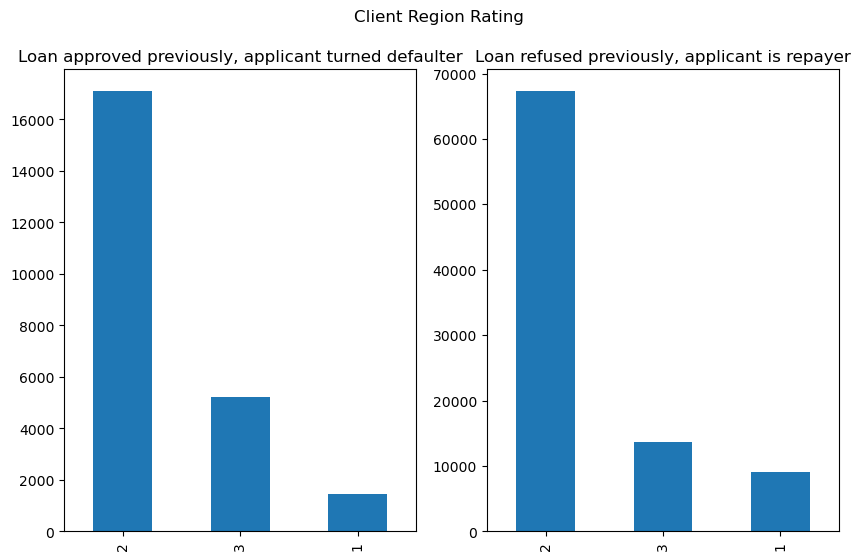

In [141]:
#Comparing the region living rating 

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
defaulters_approved['REGION_RATING_CLIENT'].value_counts().plot(kind="bar")
plt.title("Loan approved previously, applicant turned defaulter")
plt.subplot(1,2,2)
repayers_refused['REGION_RATING_CLIENT'].value_counts().plot(kind="bar")
plt.title("Loan refused previously, applicant is repayer")

plt.suptitle("Client Region Rating")

Text(0.5, 1.0, 'Loan refused previously, applicant is repayer')

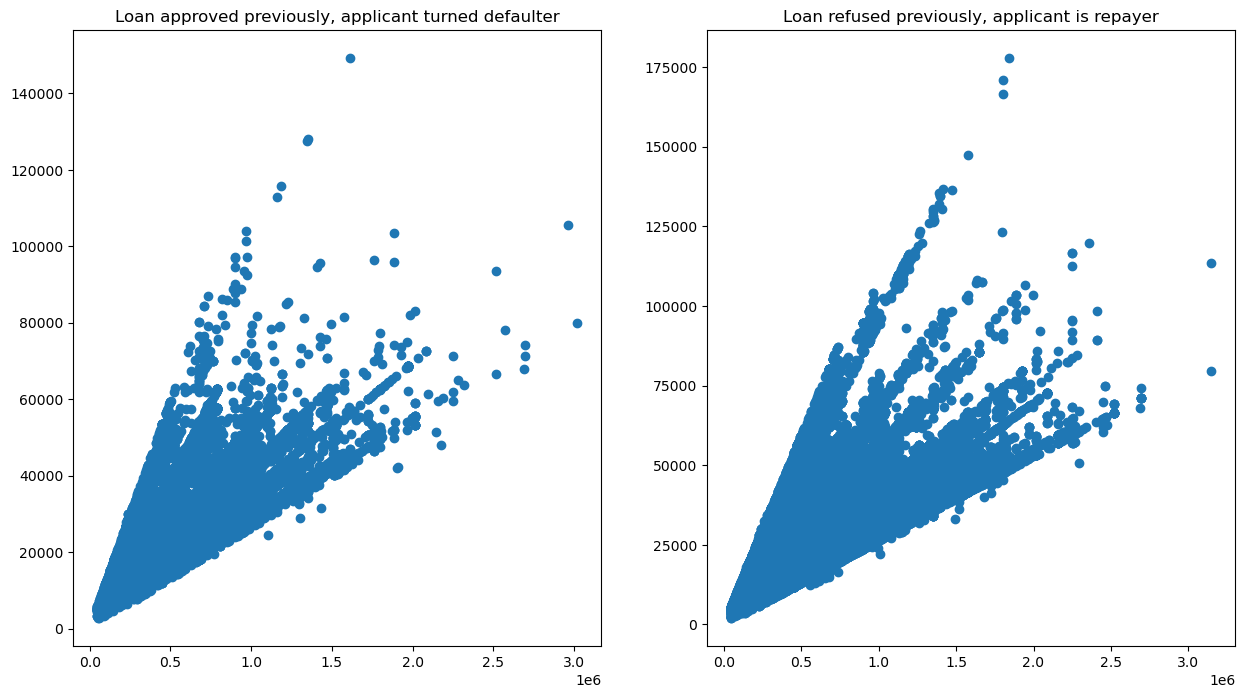

In [142]:
#Comparing the amount credited and monthly payment towards the loan

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(defaulters_approved['AMT_CREDIT'],defaulters_approved['AMT_ANNUITY'])
plt.title("Loan approved previously, applicant turned defaulter")

plt.subplot(1,2,2)
plt.scatter(repayers_refused['AMT_CREDIT'],repayers_refused['AMT_ANNUITY'])
plt.title("Loan refused previously, applicant is repayer")

Text(0.5, 0.98, 'Living Situation')

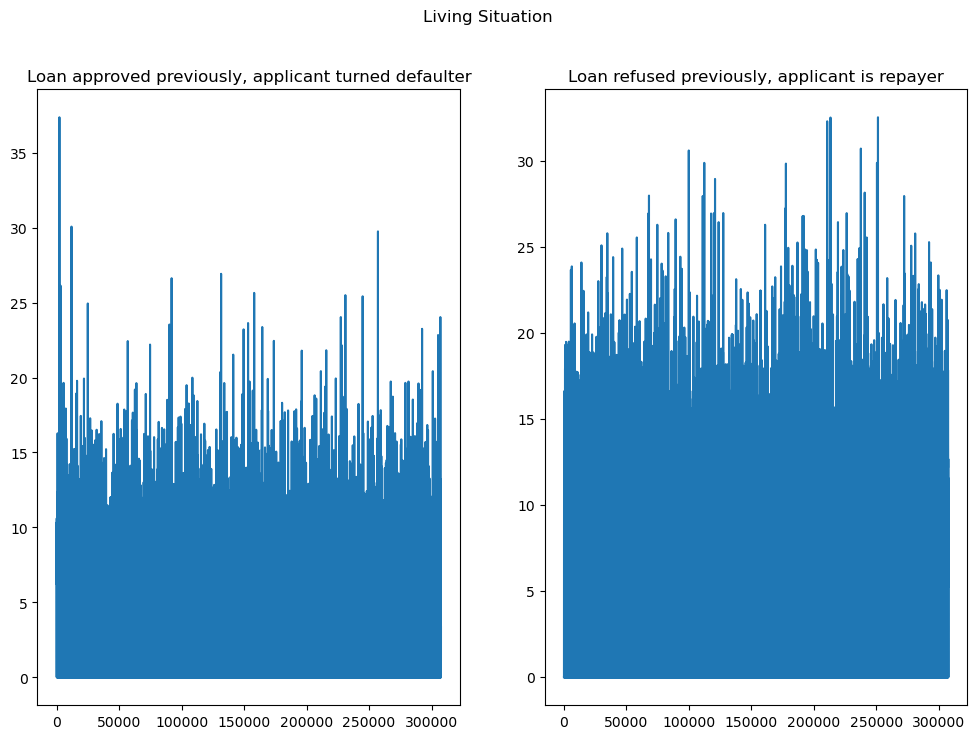

In [143]:
#Comparing the Living Situation

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(defaulters_approved['Living Situation'])
plt.title("Loan approved previously, applicant turned defaulter")

plt.subplot(1,2,2)
plt.plot(repayers_refused['Living Situation'])
plt.title("Loan refused previously, applicant is repayer")
plt.suptitle("Living Situation")

Text(0.5, 0.98, 'Docs Submitted')

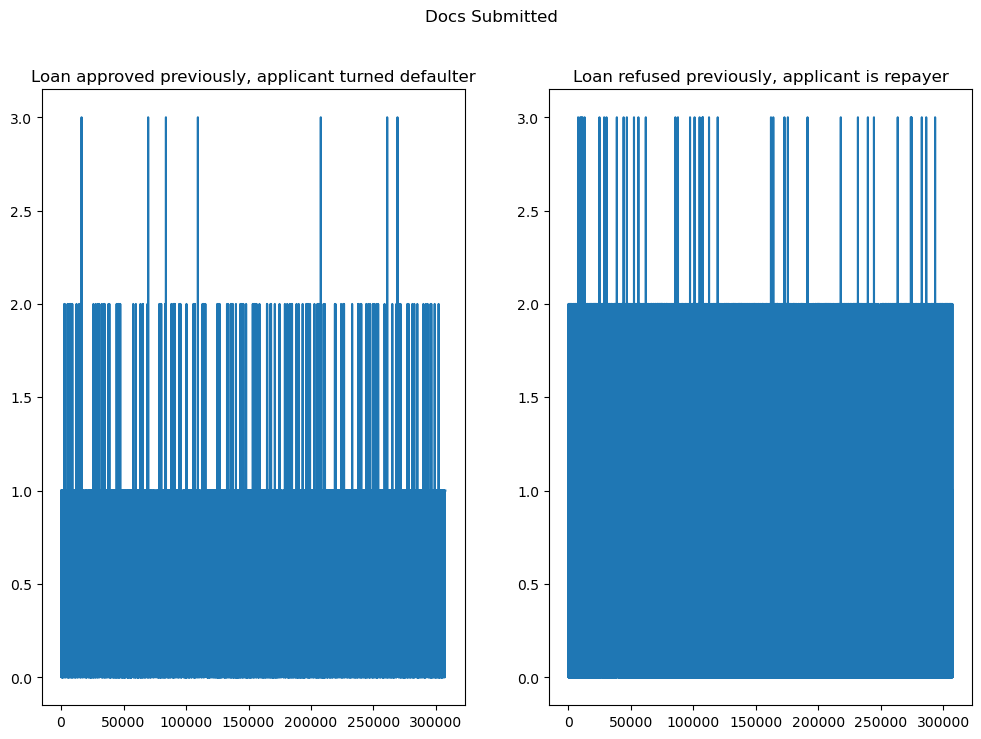

In [144]:
#Comparing the docs submitted

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(defaulters_approved['doc given'])
plt.title("Loan approved previously, applicant turned defaulter")

plt.subplot(1,2,2)
plt.plot(repayers_refused['doc given'])
plt.title("Loan refused previously, applicant is repayer")
plt.suptitle("Docs Submitted")

# Conclusion
I was able to confirm few observations from the EDA and can conclude that the follwing variables could be considered as driving factors while identifying the applicants capable of repaying the loan.

* person’s age
* car and flat ownership
* population density of the area in which they reside
* overall living situation assessment
* documents submitted

Also in certain cases I have observed that there were more outliers in the case where applicant has re-payed the loan. 
We can perform further analysis on these outliers to understand what could be driving factors for approving the loan.
The top 10 correlation matrix for both the datasets has further confirmed the EDA.
It would have been useful if the data for variables like term of loan, purpose of the loan, down payment rate, down payment amount could be tracked for current applicants as well.